# Related to Comp Graph Module Training
### --Created by Shuaixiang (Shu)
### --Aug 6, 2024

## The following evaluation scripts are used for 40000Files_8192_lossFunc3
<br />
<br />
<br />


### Read txt files and general output:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


#------------------------------------------
opName = 'opch133'
#------------------------------------------

#read data---
posX = []
posY = []
posZ = []
biasValues = []
simuValues = []
emulValues = []
with open('./data/{}_xPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posX.append(float(currentPlace))
with open('./data/{}_yPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posY.append(float(currentPlace))
with open('./data/{}_zPos.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        posZ.append(float(currentPlace))
with open('./data/{}_biasValues.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        biasValues.append(float(currentPlace))
with open('./data/{}_simuValues.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        simuValues.append(float(currentPlace))        
with open('./data/{}_emulValues.txt'.format(opName), 'r') as filehandle:
    for line in filehandle:
        currentPlace = line[:-1]
        emulValues.append(float(currentPlace))  
        
        
        
        
        
        
print("Length of posX: ", len(posX))
print("Length of posY: ", len(posY))
print("Length of posZ: ", len(posZ))
print("Length of biasValues: ", len(biasValues))
print("Length of simuValues: ", len(simuValues))
print("Length of emulValues: ", len(emulValues))
#print(posX)

Length of posX:  174103
Length of posY:  174103
Length of posZ:  174103
Length of biasValues:  174103
Length of simuValues:  174103
Length of emulValues:  174103


<br />
<br />

### Performance for active volume (inside field cage):

For field cage and APAs, the range is x[-360, 360], y[-10, 620], z[-5, 470]

Total events (biasValues[]):  174103
Events inside active volume:  68428 (39.303%)
Events out of active volume:  105675 (60.697%)

Whole space & |bias|<=1  :  118143 (67.858%)
Whole space & |bias|<=0.1:  42463 (24.390%)

Active volume & |bias|<=1  :  48333 (70.633%)
Active volume & |bias|<=0.1:  26519 (38.755%)

Inactive volume & |bias|<=1  :  69810 (66.061%)
Inactive volume & |bias|<=0.1:  15944 (15.088%)


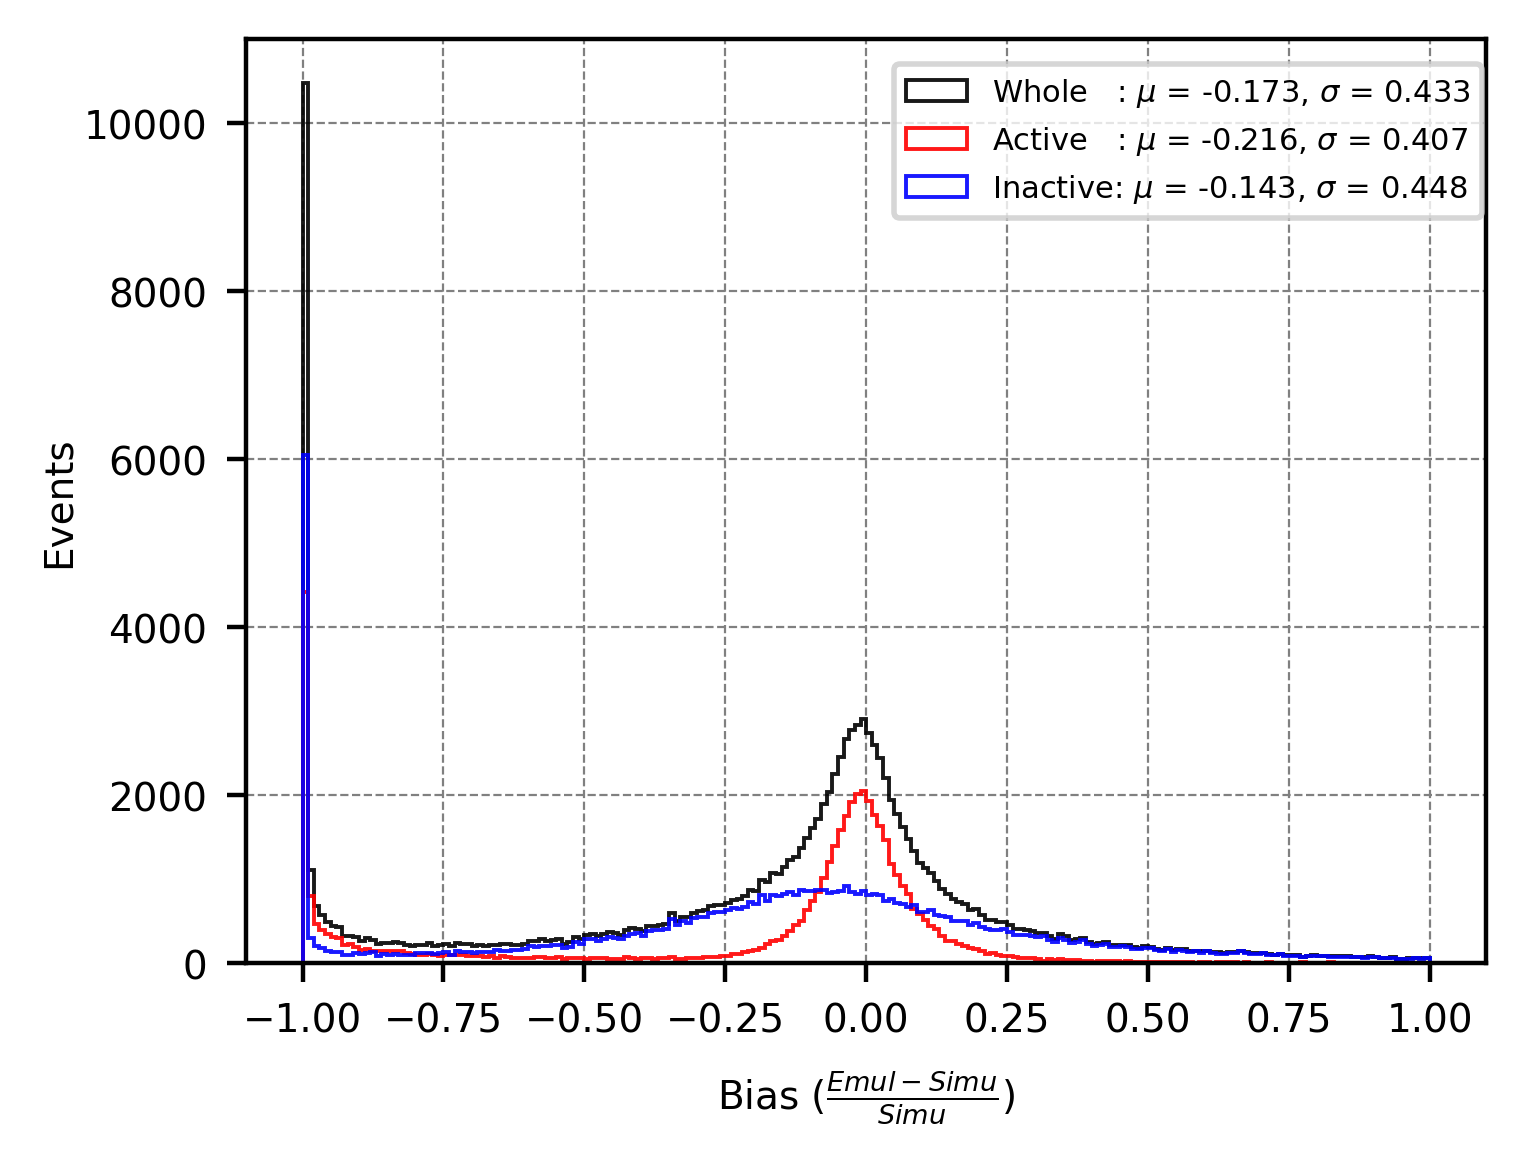

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm

plt.figure(figsize=(4,3),dpi=400)

#output statistics======================================================
active = [] #store events inside active volume---
activeNP1 = [] #active volume & bias within +-1---
inact = [] #store events out of active volume----
inactNP1 = [] # inactive volume & bias within +-1---
inactNP010 = [] # inactive volume & bias within +-0.1---

activeNP010 = [] #active volume & bias <=0.1
activeNP020 = []

activeX = [] #used to store x position of events inside field cage---
activeY = []
activeZ = []

ini_histAll = biasValues #The initial total biasValue list---
histNP1 = []
histNP010 = []

for value in ini_histAll:
    if -1 <= value <= 1:
        histNP1.append(value)
    if -0.1 <= value <= 0.1:
        histNP010.append(value)


for i in range(0, len(simuValues)):
    x = posX[i]
    y = posY[i]
    z = posZ[i]
    bias = biasValues[i]

    #Considering the thickness of apa and field cage, simply subtract by 5cm---
    if -355<x<355 and -5<y<615 and 0<z<460: #inside field cage---   
        active.append(bias)
        activeX.append(x)
        activeY.append(y)
        activeZ.append(z)
        
        if -1.0 <= bias <= 1.0:
            activeNP1.append(bias)
        if -0.1 <= bias <= 0.1:
            activeNP010.append(bias)
        if -0.2 <= bias <= 0.2:
                activeNP020.append(bias)
            
    else:
        inact.append(bias)
        
        if -1.0 <= bias <= 1.0:
            inactNP1.append(bias)
        if -0.1 <= bias <= 0.1:
            inactNP010.append(bias)

            
            
print("Total events (biasValues[]): ", len(ini_histAll))
print("Events inside active volume: ", len(active), "({:.3f}%)".format(len(active)/len(ini_histAll)*100))
print("Events out of active volume: ", len(inact), "({:.3f}%)".format(len(inact)/len(ini_histAll)*100))

print("\nWhole space & |bias|<=1  : ", len(histNP1), "({:.3f}%)".format(len(histNP1)/len(ini_histAll)*100))
print("Whole space & |bias|<=0.1: ", len(histNP010), "({:.3f}%)".format(len(histNP010)/len(ini_histAll)*100))

print("\nActive volume & |bias|<=1  : ", len(activeNP1), "({:.3f}%)".format(len(activeNP1)/len(active)*100))
print("Active volume & |bias|<=0.1: ", len(activeNP010), "({:.3f}%)".format(len(activeNP010)/len(active)*100))

print("\nInactive volume & |bias|<=1  : ", len(inactNP1), "({:.3f}%)".format(len(inactNP1)/len(inact)*100))
print("Inactive volume & |bias|<=0.1: ", len(inactNP010), "({:.3f}%)".format(len(inactNP010)/len(inact)*100))





#Drawing----------------------------------------------------------------------------
mean_ini = round(np.mean(histNP1), 3)#keep 3 decimals
std_ini = round(np.std(histNP1), 3)
plt.hist(histNP1, bins=200, range=(-1, 1), color='black', alpha=0.9, histtype='step', edgecolor='black', 
         linewidth=0.7, 
         label='Whole   : $\mu$ = {}, $\sigma$ = {}'.format(mean_ini, std_ini))

mean_activeNP1 = round(np.mean(activeNP1), 3)#keep 3 decimals
std_activeNP1 = round(np.std(activeNP1), 3)
plt.hist(activeNP1, bins=200, range=(-1, 1), color='red', alpha=0.9, histtype='step', edgecolor='red', 
         linewidth=0.7, 
         label='Active   : $\mu$ = {}, $\sigma$ = {}'.format(mean_activeNP1, std_activeNP1))

mean_inactNP1 = round(np.mean(inactNP1), 3)#keep 3 decimals
std_inactNP1 = round(np.std(inactNP1), 3)
plt.hist(inactNP1, bins=200, range=(-1, 1), color='blue', alpha=0.9, histtype='step', edgecolor='blue', 
         linewidth=0.7, 
         label='Inactive: $\mu$ = {}, $\sigma$ = {}'.format(mean_inactNP1, std_inactNP1))


plt.xlabel(r'Bias ($\frac{Emul-Simu}{Simu}$)', labelpad=5, fontsize=7)
plt.ylabel('Events', labelpad=1, fontsize=7)
#plt.title('Bias Distribution inside Active Volume', fontsize=8)

#plt.yscale('log')

plt.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.legend(loc='upper left', bbox_to_anchor=(0.51, 0.99), fontsize=8, markerscale=8, ncol=1, prop={'size': 5.5})

plt.show()

<br />
<br />
<br />
<br />

## SIMU distribution in space:

# event with simu == 0      :  51574
# event in (0, 100]         :  92732
# event in (100, 1000]      :  26228
# event in (1000, 10000]    :  3454
# event in (10000, 100000]  :  113
# event in (100000, 1000000]:  2

Total event nums            :  174103

list length of (0, 100]         :  92732
list length of (100, 1000]      :  26228
list length of (1000, 10000]    :  3454
list length of (10000, 100000]  :  113
list length of (100000, 1000000]:  2


length of groupX[ 0 ]:  92732
length of groupY[ 0 ]:  92732
length of groupZ[ 0 ]:  92732
length of groupX[ 1 ]:  26228
length of groupY[ 1 ]:  26228
length of groupZ[ 1 ]:  26228
length of groupX[ 2 ]:  3454
length of groupY[ 2 ]:  3454
length of groupZ[ 2 ]:  3454
length of groupX[ 3 ]:  113
length of groupY[ 3 ]:  113
length of groupZ[ 3 ]:  113
length of groupX[ 4 ]:  2
length of groupY[ 4 ]:  2
length of groupZ[ 4 ]:  2


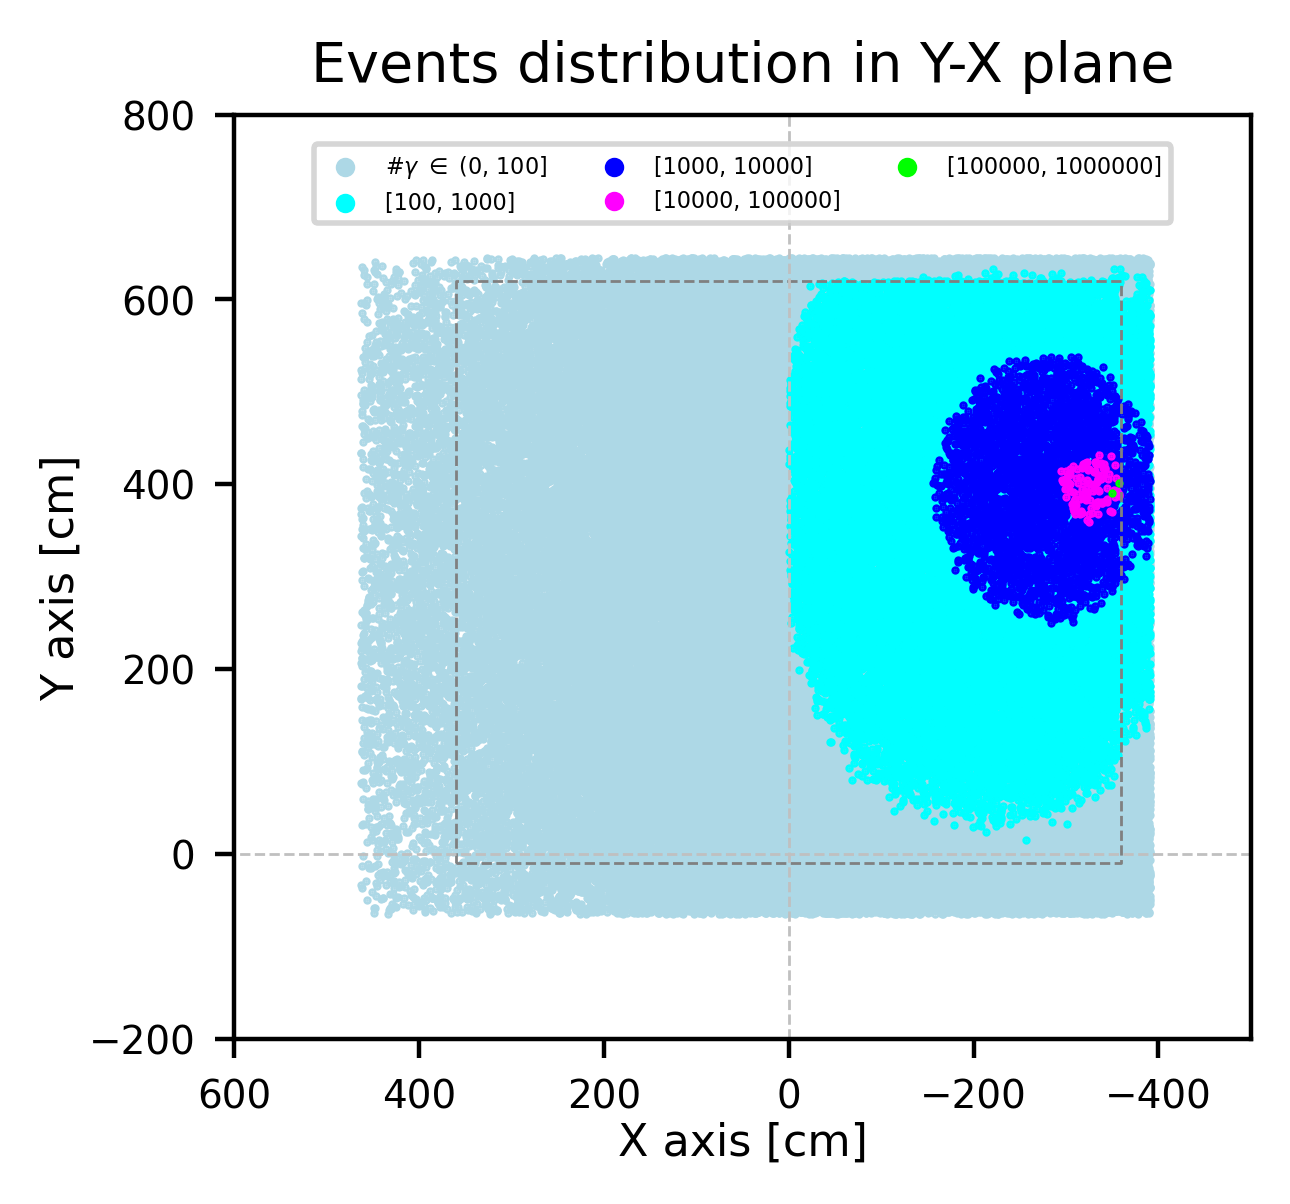

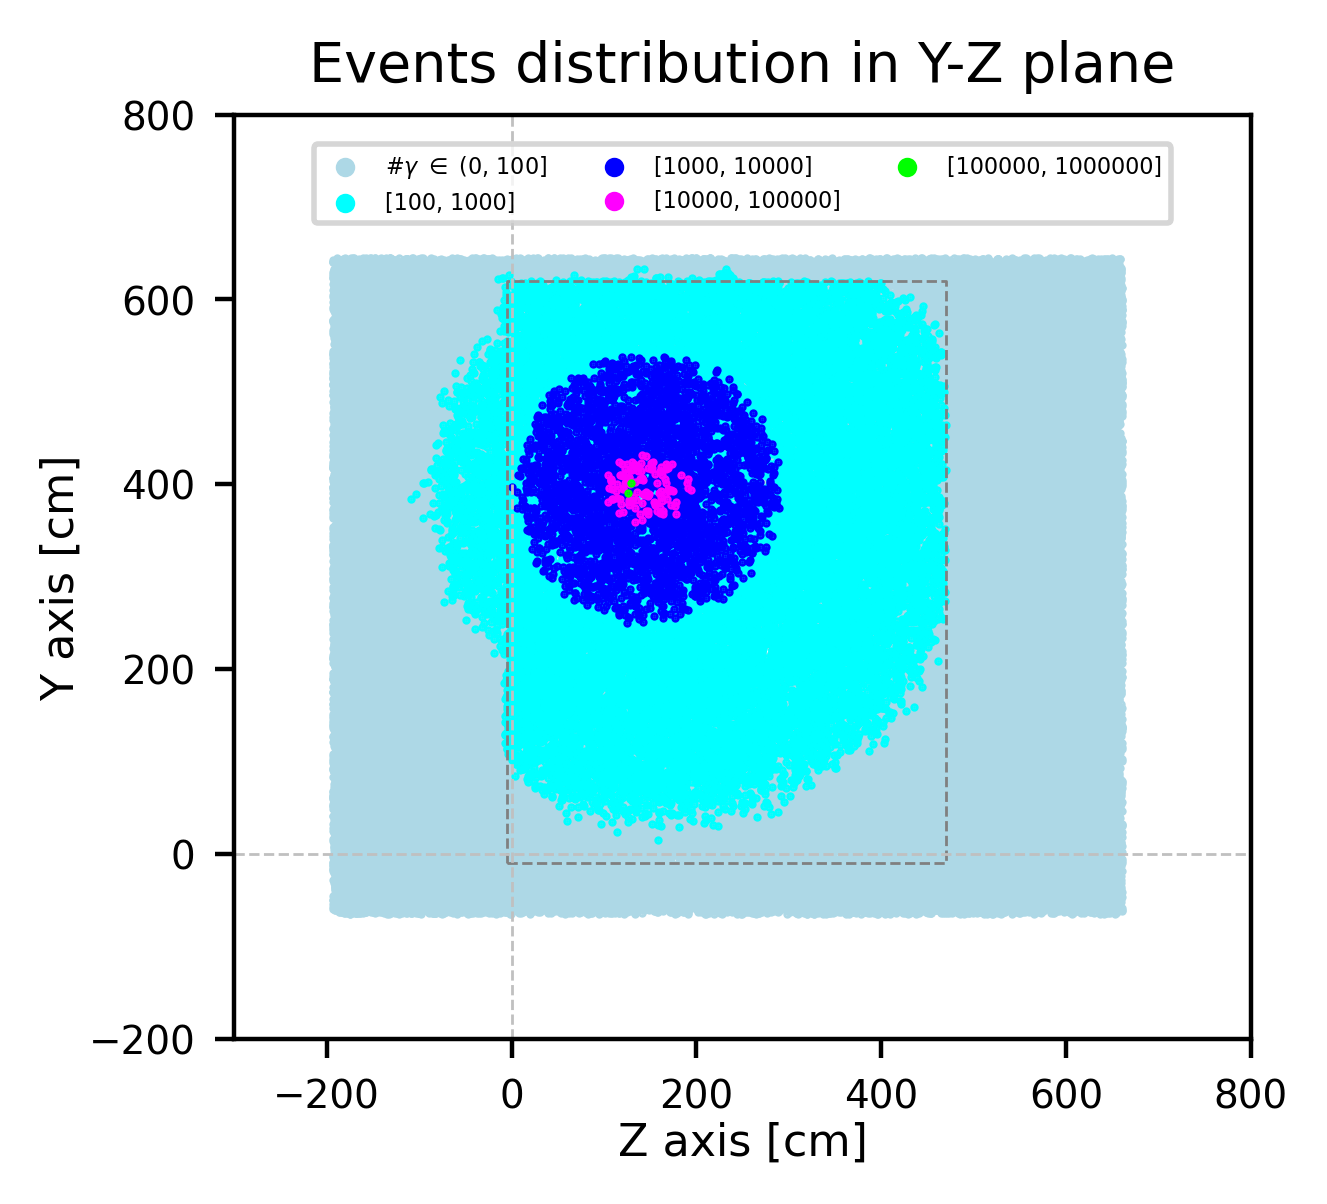

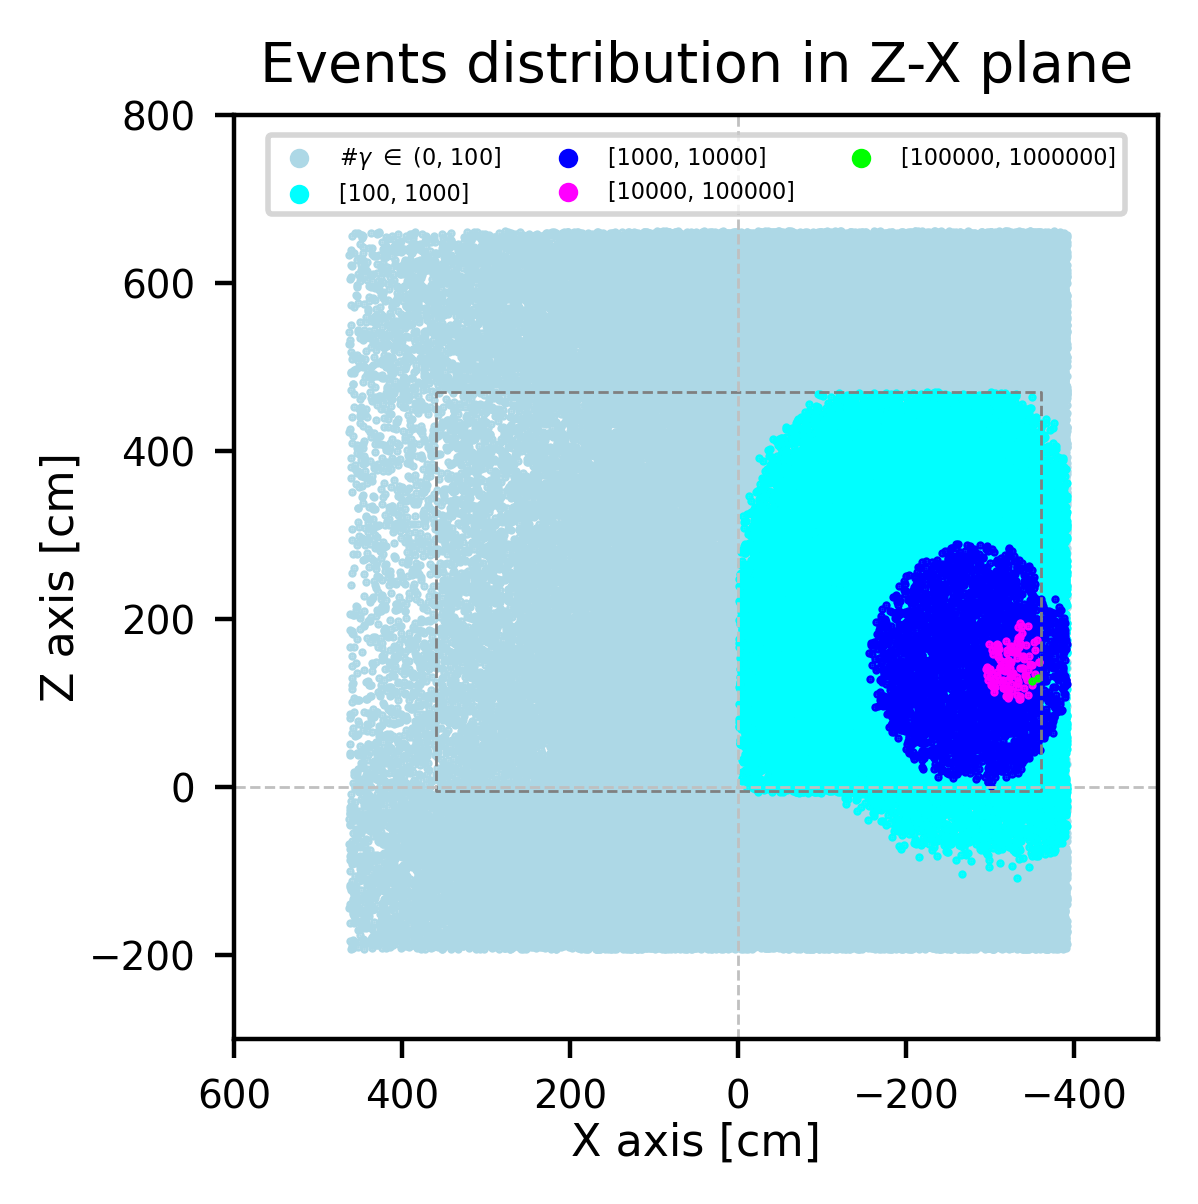

In [3]:
import matplotlib.pyplot as plt
import numpy as np

range0 = 0 #events numbers within [0, 10]
range100 = 0 #events numbers within [10, 100]
range1000 = 0 #(100, 1000]
range10000 = 0 #(1000, 10000]
range100000 = 0 #(10000, 100000]
range1000000 = 0 #(100000, 1000000]


rows = 2
list100 = [[] for _ in range(rows)]#2D list, list100[0] is label; list100[1] is photon num
list1000 = [[] for _ in range(rows)]
list10000 = [[] for _ in range(rows)]
list100000 = [[] for _ in range(rows)]
list1000000 = [[] for _ in range(rows)]


for i in range(0, len(simuValues)):
    simu = simuValues[i]

    if simu == 0:
        range0 += 1
    
    if 0 < simu <= 100:
        range100 += 1
        list100[0].append(i)
        list100[1].append(simu)
    elif 100 < simu <= 1000:
        range1000 += 1
        list1000[0].append(i)
        list1000[1].append(simu)
    elif 1000 < simu <= 10000:
        range10000 += 1
        list10000[0].append(i)
        list10000[1].append(simu)
    elif 10000 < simu <= 100000:
        range100000 += 1
        list100000[0].append(i)
        list100000[1].append(simu)
    elif 100000 < simu <= 1000000:
        range1000000 += 1
        list1000000[0].append(i)
        list1000000[1].append(simu)

print("# event with simu == 0      : ", range0)
print("# event in (0, 100]         : ", range100)
print("# event in (100, 1000]      : ", range1000)
print("# event in (1000, 10000]    : ", range10000)
print("# event in (10000, 100000]  : ", range100000)
print("# event in (100000, 1000000]: ", range1000000)
totalNum = range0 + range100+range1000+range10000+range100000+range1000000
print("\nTotal event nums            : ", totalNum)

print("\nlist length of (0, 100]         : ", len(list100[1]))
print("list length of (100, 1000]      : ", len(list1000[1]))
print("list length of (1000, 10000]    : ", len(list10000[1]))
print("list length of (10000, 100000]  : ", len(list100000[1]))
print("list length of (100000, 1000000]: ", len(list1000000[1]))
#print("\nlist1000000[][]: ", list1000000)
print("\n")



#Divide posX, posY and posZ into different (5) groups---
rows = 5
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list100[0]]#corresponding to list100
groupX[1] = [posX[i] for i in list1000[0]]#corresponding to list1000
groupX[2] = [posX[i] for i in list10000[0]]
groupX[3] = [posX[i] for i in list100000[0]]
groupX[4] = [posX[i] for i in list1000000[0]]

groupY[0] = [posY[i] for i in list100[0]]#corresponding to list100
groupY[1] = [posY[i] for i in list1000[0]]#corresponding to list1000
groupY[2] = [posY[i] for i in list10000[0]]
groupY[3] = [posY[i] for i in list100000[0]]
groupY[4] = [posY[i] for i in list1000000[0]]

groupZ[0] = [posZ[i] for i in list100[0]]#corresponding to list100
groupZ[1] = [posZ[i] for i in list1000[0]]#corresponding to list1000
groupZ[2] = [posZ[i] for i in list10000[0]]
groupZ[3] = [posZ[i] for i in list100000[0]]
groupZ[4] = [posZ[i] for i in list1000000[0]]

for i in range(0, 5):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))



    
    
    
    
    

#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -500
xmax = 600
ymin = -200
ymax = 800
zmin = -300
zmax = 800

#Y-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [-10, 620, 620, -10, -10]
cageXY_x = [360, 360, -360, -360, 360]
plt.plot(cageXY_x, cageXY_y, color="grey", linewidth=0.5, linestyle='--')


#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(xmin, xmax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(ymin, ymax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi2, yauxi1, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi2, xauxi1, color="silver", linewidth=0.5, linestyle='--')

#Drawing of data points------
plt.scatter(groupX[0], groupY[0], c='lightblue', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ (0, 100]')
plt.scatter(groupX[1], groupY[1], c='cyan', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[2], groupY[2], c='blue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupY[3], c='magenta', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[4], groupY[4], c='lime', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.title('Events distribution in Y-X plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YX.png')
plt.show()    
#---------------------------------------------------------








#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupZ[0], groupY[0], c='lightblue', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ (0, 100]')
plt.scatter(groupZ[1], groupY[1], c='cyan', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupZ[2], groupY[2], c='blue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupZ[3], groupY[3], c='magenta', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupZ[4], groupY[4], c='lime', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Y-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_YZ.png')
plt.show()    
#---------------------------------------------------------






#Z-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageZY_x = [360, -360, -360, 360, 360]
cageZY_z = [470, 470, -5, -5, 470]
plt.plot(cageZY_x, cageZY_z, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) axis---
yauxi5 = [zmin, zmax]
yauxi6 = [0, 0]
plt.plot(yauxi6, yauxi5, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [xmin, xmax]
plt.plot(xauxi6, xauxi5, color="silver", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupX[0], groupZ[0], c='lightblue', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ (0, 100]')
plt.scatter(groupX[1], groupZ[1], c='cyan', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[2], groupZ[2], c='blue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupZ[3], c='magenta', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[4], groupZ[4], c='lime', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(zmin, zmax)
plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Z-X plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('simu_ZX.png')
plt.show()    
#---------------------------------------------------------











<br />
<br />
<br />
<br />

## EMUL distribution in space:

# event with emul == 0      :  72853
# event in (0, 100]         :  71689
# event in (100, 1000]      :  26039
# event in (1000, 10000]    :  3406
# event in (10000, 100000]  :  116
# event in (100000, 1000000]:  0

Total event nums            :  174103

list length of (0, 100]         :  71689
list length of (100, 1000]      :  26039
list length of (1000, 10000]    :  3406
list length of (10000, 100000]  :  116
list length of (100000, 1000000]:  0


length of groupX[ 0 ]:  71689
length of groupY[ 0 ]:  71689
length of groupZ[ 0 ]:  71689
length of groupX[ 1 ]:  26039
length of groupY[ 1 ]:  26039
length of groupZ[ 1 ]:  26039
length of groupX[ 2 ]:  3406
length of groupY[ 2 ]:  3406
length of groupZ[ 2 ]:  3406
length of groupX[ 3 ]:  116
length of groupY[ 3 ]:  116
length of groupZ[ 3 ]:  116
length of groupX[ 4 ]:  0
length of groupY[ 4 ]:  0
length of groupZ[ 4 ]:  0


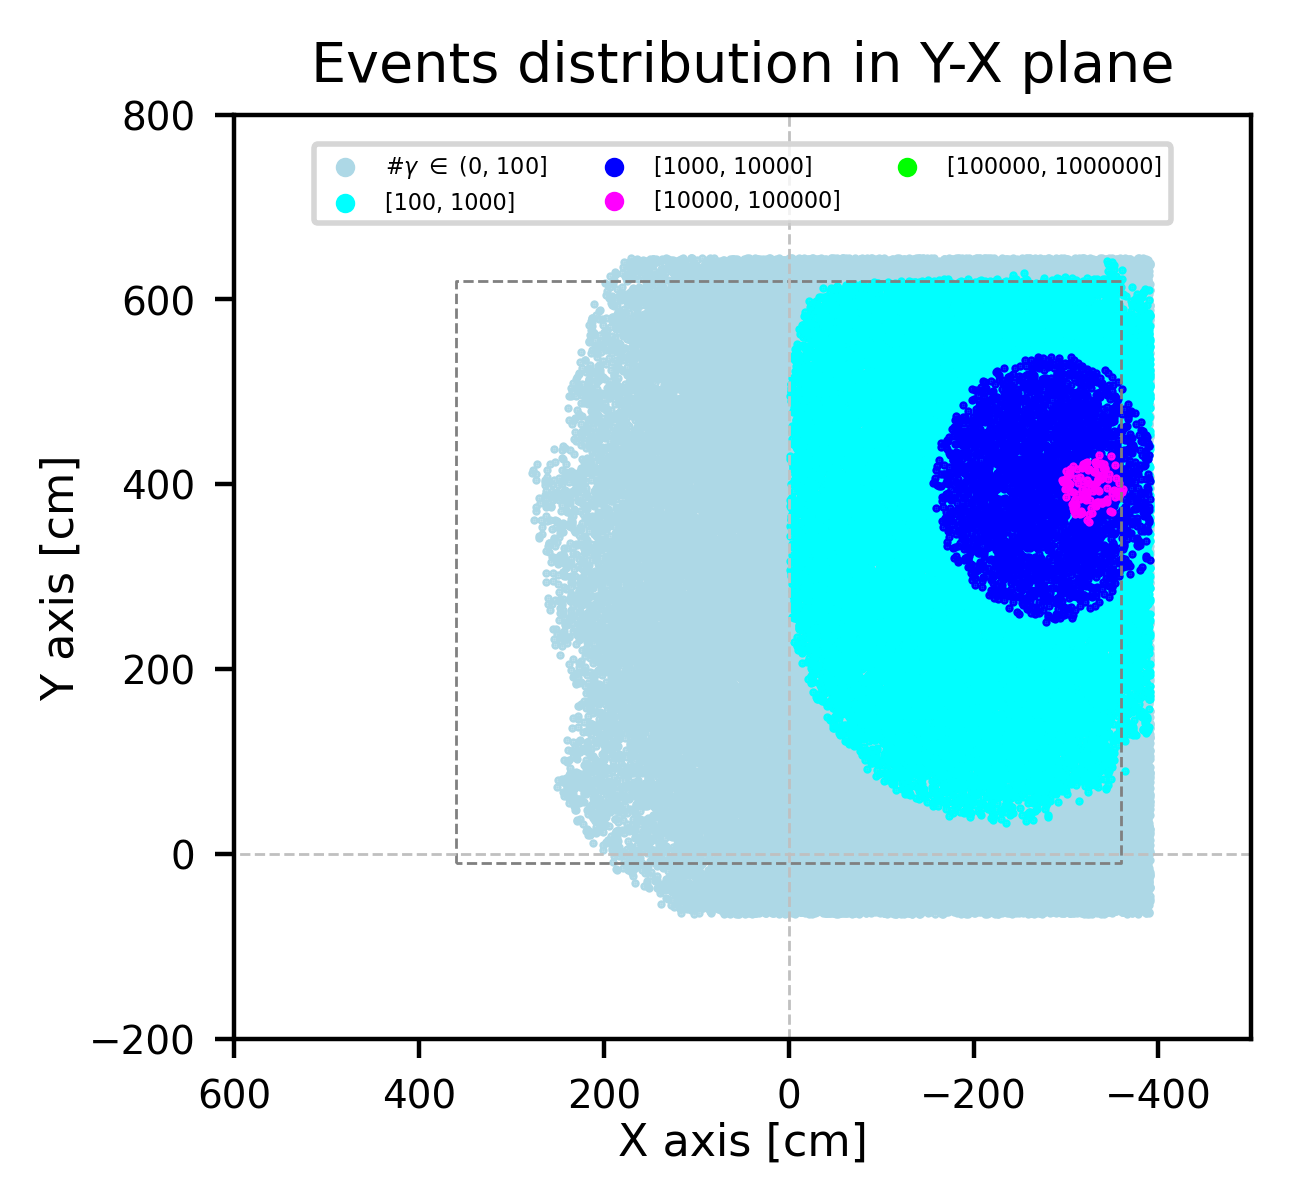

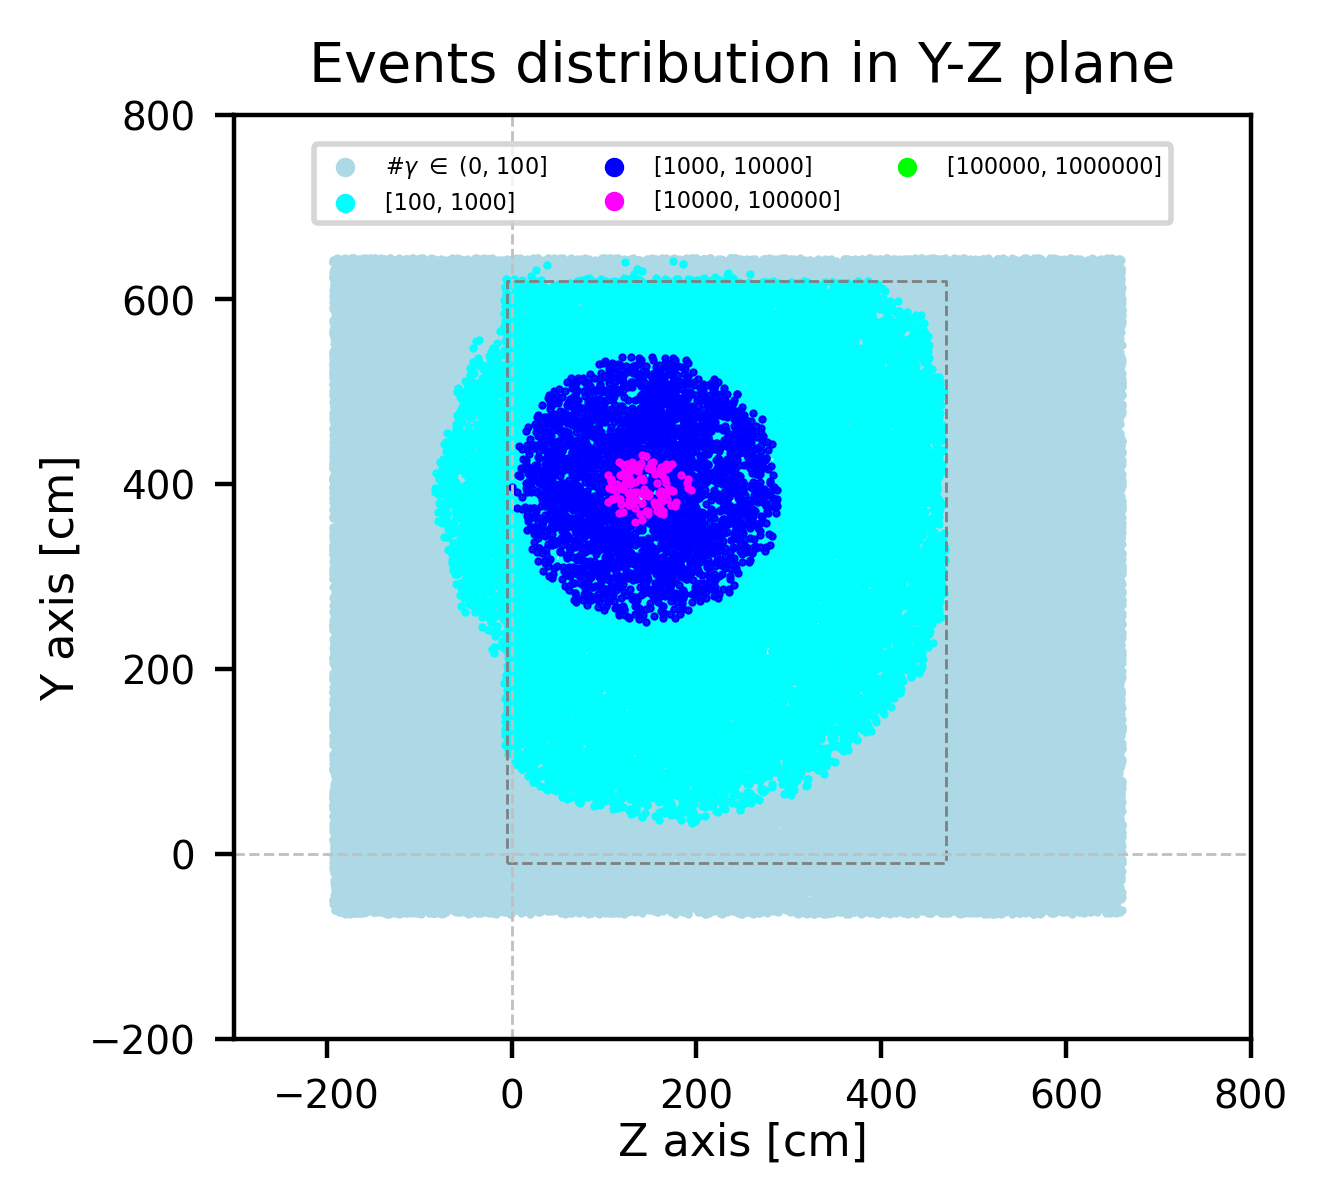

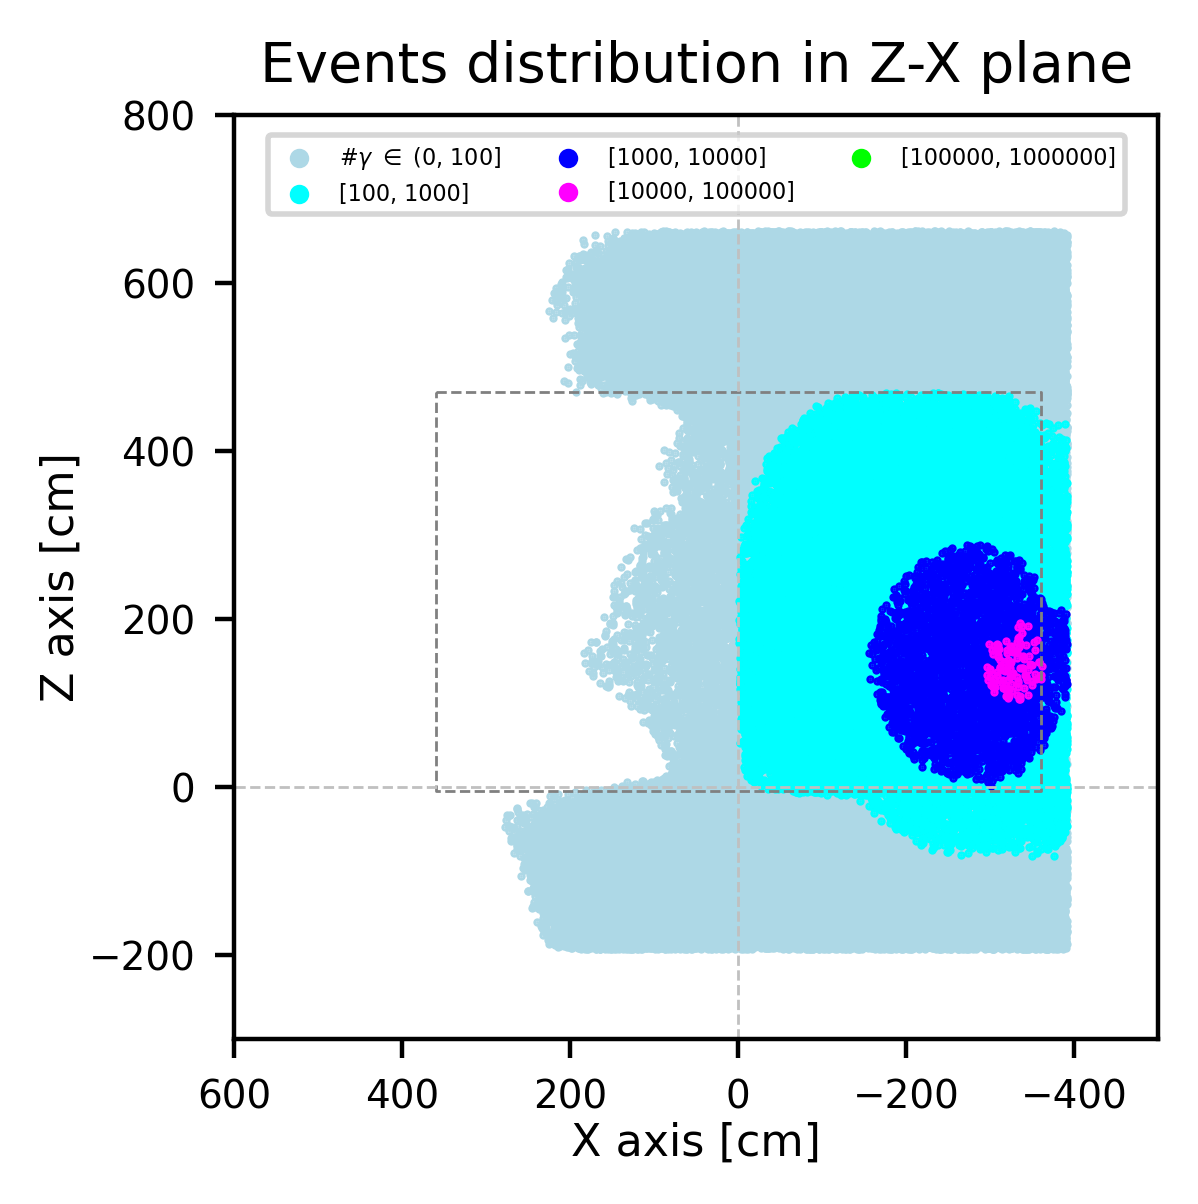

In [4]:
import matplotlib.pyplot as plt
import numpy as np

range0 = 0 #events numbers within [0, 10]
range100 = 0 #events numbers within [10, 100]
range1000 = 0 #(100, 1000]
range10000 = 0 #(1000, 10000]
range100000 = 0 #(10000, 100000]
range1000000 = 0 #(100000, 1000000]


rows = 2
list100 = [[] for _ in range(rows)]#2D list, list100[0] is label; list100[1] is photon num
list1000 = [[] for _ in range(rows)]
list10000 = [[] for _ in range(rows)]
list100000 = [[] for _ in range(rows)]
list1000000 = [[] for _ in range(rows)]


for i in range(0, len(emulValues)):
    simu = emulValues[i]

    if simu == 0:
        range0 += 1
    
    if 0 < simu <= 100:
        range100 += 1
        list100[0].append(i)
        list100[1].append(simu)
    elif 100 < simu <= 1000:
        range1000 += 1
        list1000[0].append(i)
        list1000[1].append(simu)
    elif 1000 < simu <= 10000:
        range10000 += 1
        list10000[0].append(i)
        list10000[1].append(simu)
    elif 10000 < simu <= 100000:
        range100000 += 1
        list100000[0].append(i)
        list100000[1].append(simu)
    elif 100000 < simu <= 1000000:
        range1000000 += 1
        list1000000[0].append(i)
        list1000000[1].append(simu)

print("# event with emul == 0      : ", range0)
print("# event in (0, 100]         : ", range100)
print("# event in (100, 1000]      : ", range1000)
print("# event in (1000, 10000]    : ", range10000)
print("# event in (10000, 100000]  : ", range100000)
print("# event in (100000, 1000000]: ", range1000000)
totalNum = range0 + range100+range1000+range10000+range100000+range1000000
print("\nTotal event nums            : ", totalNum)

print("\nlist length of (0, 100]         : ", len(list100[1]))
print("list length of (100, 1000]      : ", len(list1000[1]))
print("list length of (1000, 10000]    : ", len(list10000[1]))
print("list length of (10000, 100000]  : ", len(list100000[1]))
print("list length of (100000, 1000000]: ", len(list1000000[1]))
#print("\nlist1000000[][]: ", list1000000)
print("\n")



#Divide posX, posY and posZ into different (5) groups---
rows = 5
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list100[0]]#corresponding to list100
groupX[1] = [posX[i] for i in list1000[0]]#corresponding to list1000
groupX[2] = [posX[i] for i in list10000[0]]
groupX[3] = [posX[i] for i in list100000[0]]
groupX[4] = [posX[i] for i in list1000000[0]]

groupY[0] = [posY[i] for i in list100[0]]#corresponding to list100
groupY[1] = [posY[i] for i in list1000[0]]#corresponding to list1000
groupY[2] = [posY[i] for i in list10000[0]]
groupY[3] = [posY[i] for i in list100000[0]]
groupY[4] = [posY[i] for i in list1000000[0]]

groupZ[0] = [posZ[i] for i in list100[0]]#corresponding to list100
groupZ[1] = [posZ[i] for i in list1000[0]]#corresponding to list1000
groupZ[2] = [posZ[i] for i in list10000[0]]
groupZ[3] = [posZ[i] for i in list100000[0]]
groupZ[4] = [posZ[i] for i in list1000000[0]]

for i in range(0, 5):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))







    
    
    
    

#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -500
xmax = 600
ymin = -200
ymax = 800
zmin = -300
zmax = 800

#Y-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [-10, 620, 620, -10, -10]
cageXY_x = [360, 360, -360, -360, 360]
plt.plot(cageXY_x, cageXY_y, color="grey", linewidth=0.5, linestyle='--')


#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(xmin, xmax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(ymin, ymax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi2, yauxi1, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi2, xauxi1, color="silver", linewidth=0.5, linestyle='--')

#Drawing of data points------
plt.scatter(groupX[0], groupY[0], c='lightblue', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ (0, 100]')
plt.scatter(groupX[1], groupY[1], c='cyan', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[2], groupY[2], c='blue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupY[3], c='magenta', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[4], groupY[4], c='lime', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.title('Events distribution in Y-X plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('emul_YX.png')
plt.show()    
#---------------------------------------------------------








#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupZ[0], groupY[0], c='lightblue', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ (0, 100]')
plt.scatter(groupZ[1], groupY[1], c='cyan', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupZ[2], groupY[2], c='blue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupZ[3], groupY[3], c='magenta', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupZ[4], groupY[4], c='lime', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Y-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file

plt.show()    
#---------------------------------------------------------






#Z-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageZY_x = [360, -360, -360, 360, 360]
cageZY_z = [470, 470, -5, -5, 470]
plt.plot(cageZY_x, cageZY_z, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) axis---
yauxi5 = [zmin, zmax]
yauxi6 = [0, 0]
plt.plot(yauxi6, yauxi5, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [xmin, xmax]
plt.plot(xauxi6, xauxi5, color="silver", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupX[0], groupZ[0], c='lightblue', s=1.0, alpha=1.0, marker='.', label='#$\gamma$ $\in$ (0, 100]')
plt.scatter(groupX[1], groupZ[1], c='cyan', s=1.0, alpha=1.0, marker='.', label='[100, 1000]')
plt.scatter(groupX[2], groupZ[2], c='blue', s=1.0, alpha=1.0, marker='.', label='[1000, 10000]')
plt.scatter(groupX[3], groupZ[3], c='magenta', s=1.0, alpha=1.0, marker='.', label='[10000, 100000]')
plt.scatter(groupX[4], groupZ[4], c='lime', s=1.0, alpha=1.0, marker='.', label='[100000, 1000000]')


plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(zmin, zmax)
plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Z-X plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file

plt.show()    
#---------------------------------------------------------

<br />
<br />
<br />
<br />

## (Simu vs Emul), (Simu vs Bias) plots:

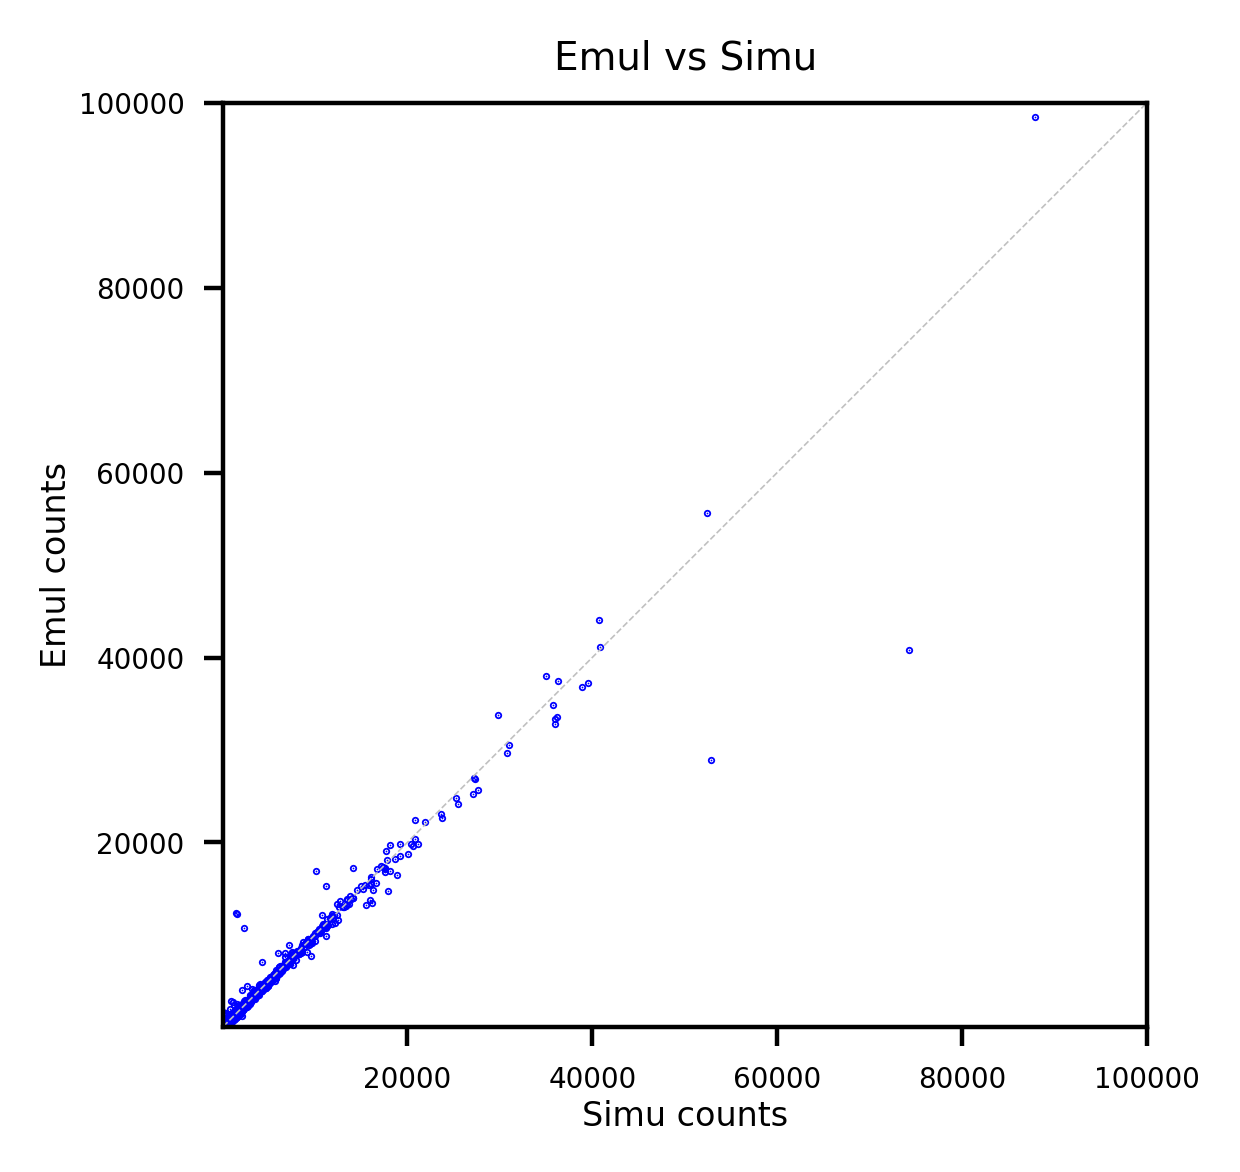

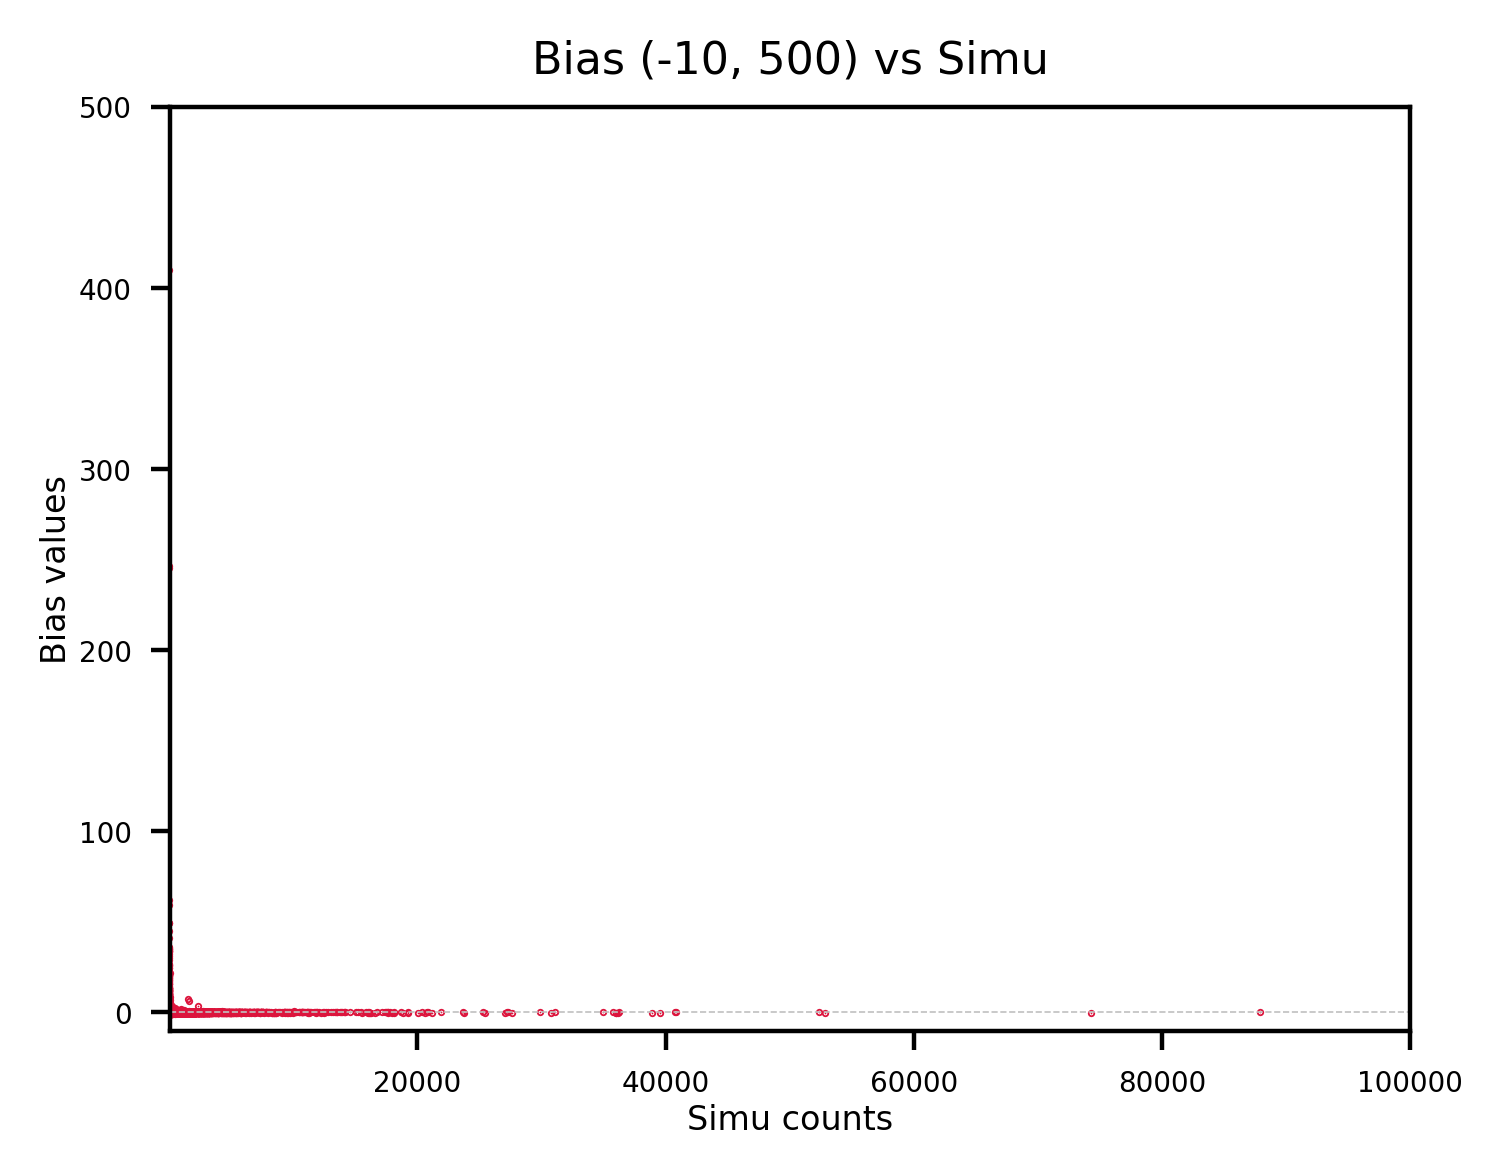

In [5]:
import matplotlib.pyplot as plt
import numpy as np


#Bias vs Simu==========================================================
plt.figure(figsize=(4,3),dpi=400)

#y=x---
plt.plot([100, 100000], [100, 100000], color="silver", linewidth=0.3, linestyle='--')


#plt.plot([200000, 600000, 600000, 200000, 200000], [0, 0, 80000, 80000, 0], color="green", linewidth=0.8, linestyle='-')
#plt.plot([200000, 600000, 600000, 200000, 200000], [90000, 90000, 250000, 250000, 90000], 
#         color="violet", linewidth=0.8, linestyle='-')

#Drawing of data points------
plt.scatter(simuValues, emulValues, c='blue', s=0.4, alpha=1.0, marker='.', label='[1000, 10000]')

plt.axis('scaled')
plt.xlim(100, 100000)
plt.ylim(100, 100000)
plt.xlabel('Simu counts', labelpad=1, fontsize=6)
plt.ylabel('Emul counts', labelpad=1, fontsize=6)



plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Emul vs Simu', fontsize=7)


#Save the plot as a PNG file
#plt.savefig('emul_vs_simu.png', bbox_inches='tight')
plt.show()    










#Bias vs Simu (-10, 500)==========================================================
plt.figure(figsize=(4,3),dpi=400)

#y=x---
plt.plot([90, 100000], [0, 0], color="silver", linewidth=0.3, linestyle='--')

#Drawing of data points------
plt.scatter(simuValues, biasValues, c='crimson', s=0.4, alpha=1.0, marker='.', label='[1000, 10000]')

#plt.axis('scaled')
plt.xlim(90, 100000)
plt.ylim(-10, 500)
plt.xlabel('Simu counts', labelpad=1, fontsize=6)
plt.ylabel('Bias values', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Bias (-10, 500) vs Simu', fontsize=8)


#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 

<br />
<br />
<br />
<br />

## Bias distribution (Cut simu<=100):


All results are after simu>=100 cut!!!

Whole volume   :  29797
Active volume  :  25807 (86.609%)
Inactive volume:  3990 (13.391%)

Whole space & |bias|<=1  :  29745 (99.825%)
Whole space & |bias|<=0.1:  23664 (79.417%)

Active volume & |bias|<=1  :  25801 (99.977%)
Active volume & |bias|<=0.1:  21710 (84.124%)

Inactive volume & |bias|<=1  :  3944 (98.847%)
Inactive volume & |bias|<=0.1:  1954 (48.972%)


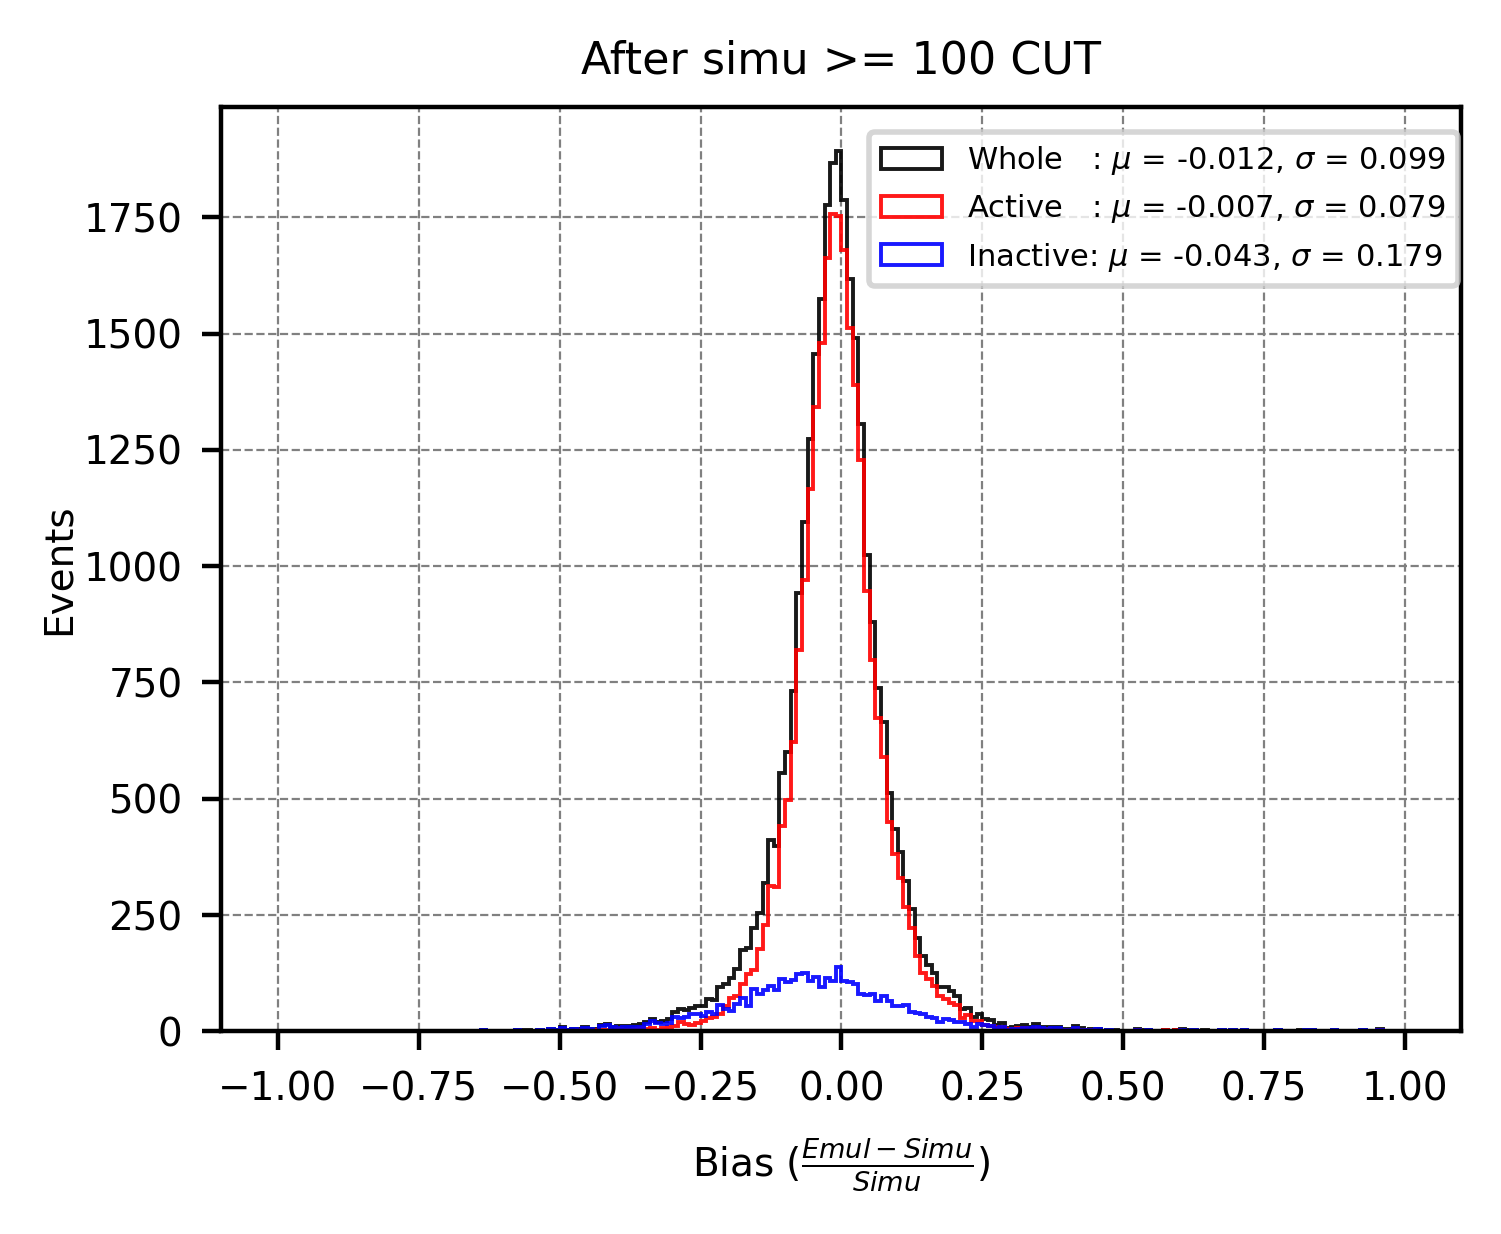

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm

plt.figure(figsize=(4,3),dpi=400)

#output statistics======================================================
whole = []
wholeNP1 = []
wholeNP010 = []

active = [] #store events inside active volume---
activeNP1 = [] #active volume & bias within +-1---
activeNP010 = [] #active volume & bias <=0.1

inact = [] #store events out of active volume----
inactNP1 = [] # inactive volume & bias within +-1---
inactNP010 = [] # inactive volume & bias within +-0.1---




for i in range(0, len(posX)):
    simu = simuValues[i]
    emul = emulValues[i]
    bias = biasValues[i]
    x = posX[i]
    y = posY[i]
    z = posZ[i]

    if simu > 100:
        whole.append(bias)

        if -1 <= bias <= 1:
            wholeNP1.append(bias)
        if -0.1 <= bias <= 0.1:
            wholeNP010.append(bias)   

        
        #Considering the thickness of apa and field cage, simply subtract by 5cm---
        if -355<x<355 and -5<y<615 and 0<z<460: #inside field cage---   
            active.append(bias)

            if -1 <= bias <= 1:
                activeNP1.append(bias)
            if -0.1 <= bias <= 0.1:
                activeNP010.append(bias)          

        else:
            inact.append(bias)
        
            if -1.0 <= bias <= 1.0:
                inactNP1.append(bias)
            if -0.1 <= bias <= 0.1:
                inactNP010.append(bias)

    else: continue


            
print("\nAll results are after simu>=100 cut!!!")
print("\nWhole volume   : ", len(whole))
print("Active volume  : ", len(active), "({:.3f}%)".format(len(active)/len(whole)*100))
print("Inactive volume: ", len(inact), "({:.3f}%)".format(len(inact)/len(whole)*100))

print("\nWhole space & |bias|<=1  : ", len(wholeNP1), "({:.3f}%)".format(len(wholeNP1)/len(whole)*100))
print("Whole space & |bias|<=0.1: ", len(wholeNP010), "({:.3f}%)".format(len(wholeNP010)/len(whole)*100))

print("\nActive volume & |bias|<=1  : ", len(activeNP1), "({:.3f}%)".format(len(activeNP1)/len(active)*100))
print("Active volume & |bias|<=0.1: ", len(activeNP010), "({:.3f}%)".format(len(activeNP010)/len(active)*100))

print("\nInactive volume & |bias|<=1  : ", len(inactNP1), "({:.3f}%)".format(len(inactNP1)/len(inact)*100))
print("Inactive volume & |bias|<=0.1: ", len(inactNP010), "({:.3f}%)".format(len(inactNP010)/len(inact)*100))





#Drawing----------------------------------------------------------------------------
mean_ini = round(np.mean(wholeNP1), 3)#keep 3 decimals
std_ini = round(np.std(wholeNP1), 3)
plt.hist(wholeNP1, bins=200, range=(-1, 1), color='black', alpha=0.9, histtype='step', edgecolor='black', 
         linewidth=0.7, label='Whole   : $\mu$ = {}, $\sigma$ = {}'.format(mean_ini, std_ini))

mean_activeNP1 = round(np.mean(activeNP1), 3)#keep 3 decimals
std_activeNP1 = round(np.std(activeNP1), 3)
plt.hist(activeNP1, bins=200, range=(-1, 1), color='red', alpha=0.9, histtype='step', edgecolor='red', 
         linewidth=0.7, 
         label='Active   : $\mu$ = {}, $\sigma$ = {}'.format(mean_activeNP1, std_activeNP1))

mean_inactNP1 = round(np.mean(inactNP1), 3)#keep 3 decimals
std_inactNP1 = round(np.std(inactNP1), 3)
plt.hist(inactNP1, bins=200, range=(-1, 1), color='blue', alpha=0.9, histtype='step', edgecolor='blue', 
         linewidth=0.7, 
         label='Inactive: $\mu$ = {}, $\sigma$ = {}'.format(mean_inactNP1, std_inactNP1))


plt.xlabel(r'Bias ($\frac{Emul-Simu}{Simu}$)', labelpad=5, fontsize=7)
plt.ylabel('Events', labelpad=1, fontsize=7)
plt.title('After simu >= 100 CUT', fontsize=8)

#plt.yscale('log')

plt.grid(color='gray', linestyle='--', linewidth=0.4, zorder=0)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.legend(loc='upper left', bbox_to_anchor=(0.51, 0.99), fontsize=8, markerscale=8, ncol=1, prop={'size': 5.5})

plt.show()

<br />
<br />

### (Simu vs Bias) (log(x)) & 2D plots:

In [7]:
#output statistics======================================================
hist100 = []
hist1k = []#store bias values when the photon num is within [100, 1000]
hist10k = []
hist100k = []
hist1000k = []
histAll = biasValues

for phNum in simuValues:
    index = simuValues.index(phNum)
    bias = biasValues[index]

    if 0 < phNum <= 100:
        hist100.append(bias)
    if 100 < phNum <= 1000:
        hist1k.append(bias)
    if 1000 < phNum <= 10000:
        hist10k.append(bias)
    if 10000 < phNum <= 100000:
        hist100k.append(bias)
    if 100000 < phNum <= 1000000:
        hist1000k.append(bias)
    

print("Num of biasValue inside [0, 100]         : ", len(hist100))        
print("Num of biasValue inside [100, 1000]      : ", len(hist1k))
print("Num of biasValue inside [1000, 10000]    : ", len(hist10k))
print("Num of biasValue inside [10000, 100000]  : ", len(hist100k))
print("Num of biasValue inside [100000, 1000000]: ", len(hist1000k))
print("Num of biasValue inside [0, 1000000]     : ", len(histAll))


mean100 = round(np.mean(hist100), 3)#keep 3 decimals
std100 = round(np.std(hist100), 3)
mean1k = round(np.mean(hist1k), 3)#keep 3 decimals
std1k = round(np.std(hist1k), 3)
mean10k = round(np.mean(hist10k), 3)#keep 3 decimals
std10k = round(np.std(hist10k), 3)
mean100k = round(np.mean(hist100k), 3)#keep 3 decimals
std100k = round(np.std(hist100k), 3)
mean1000k = round(np.mean(hist1000k), 3)#keep 3 decimals
std1000k = round(np.std(hist1000k), 3)
meanAll = round(np.mean(histAll), 3)#keep 3 decimals
stdAll = round(np.std(histAll), 3)
print("\nFor [0, 100]         : mean = ", mean100, ", std = ", std100)
print("For [100, 1000]      : mean = ", mean1k, ", std = ", std1k)
print("For [1000, 10000]    : mean = ", mean10k, ", std = ", std10k)
print("For [10000, 100000]  : mean = ", mean100k, ", std = ", std100k)
print("For [100000, 1000000]: mean = ", mean1000k, ", std = ", std1000k)
print("For [0, 1000000]     : mean = ", meanAll, ", std = ", stdAll)
#----------------------------------------------------------------------






#Only keep data with -1<=bias<=1
biasPN1 = []
logSimu = []
for label in range(0, len(biasValues)):
    if -1 <= biasValues[label] <= 1:
        biasPN1.append(biasValues[label])
        logSimu.append(math.log10(simuValues[label]))

print("\nSize of baisPN1: ", len(biasPN1))    
print("Size of logSImu: ", len(logSimu))


activeNP1 = []
activeSimuNP1 = []
for i in range(0, len(simuValues)):
    x = posX[i]
    y = posY[i]
    z = posZ[i]
    bias = biasValues[i]
    simu = simuValues[i]

    #Considering the thickness of apa and field cage, simply subtract by 5cm---
    if -355<x<355 and -5<y<615 and 0<z<460 and -1<=bias<=1: #inside field cage---   
        activeNP1.append(bias)
        activeSimuNP1.append(math.log10(simu))

print("\nSize of baisPN1 (active): ", len(activeNP1))    
print("Size of logSImu (active): ", len(activeSimuNP1))






Num of biasValue inside [0, 100]         :  92732
Num of biasValue inside [100, 1000]      :  26228
Num of biasValue inside [1000, 10000]    :  3454
Num of biasValue inside [10000, 100000]  :  113
Num of biasValue inside [100000, 1000000]:  2
Num of biasValue inside [0, 1000000]     :  174103

For [0, 100]         : mean =  -0.221 , std =  0.428
For [100, 1000]      : mean =  -0.005 , std =  0.101
For [1000, 10000]    : mean =  -0.013 , std =  0.087
For [10000, 100000]  : mean =  -0.009 , std =  0.111
For [100000, 1000000]: mean =  -0.569 , std =  0.332
For [0, 1000000]     : mean =  nan , std =  nan

Size of baisPN1:  118143
Size of logSImu:  118143

Size of baisPN1 (active):  48333
Size of logSImu (active):  48333


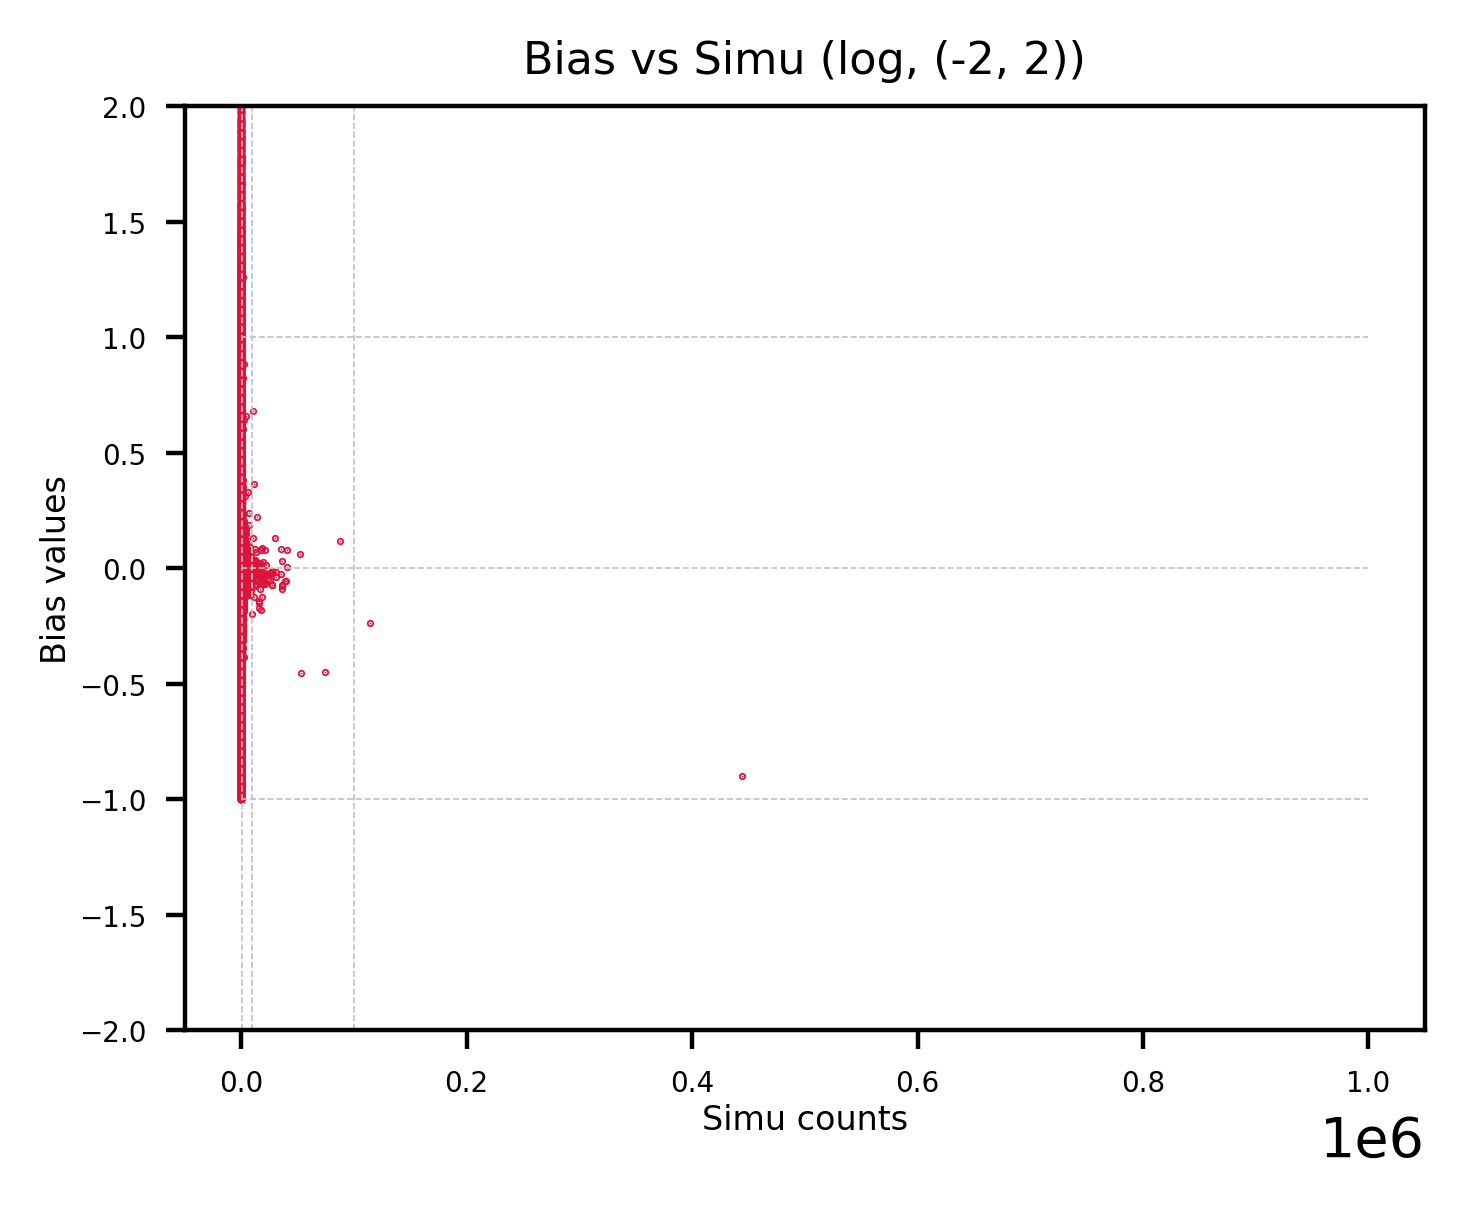

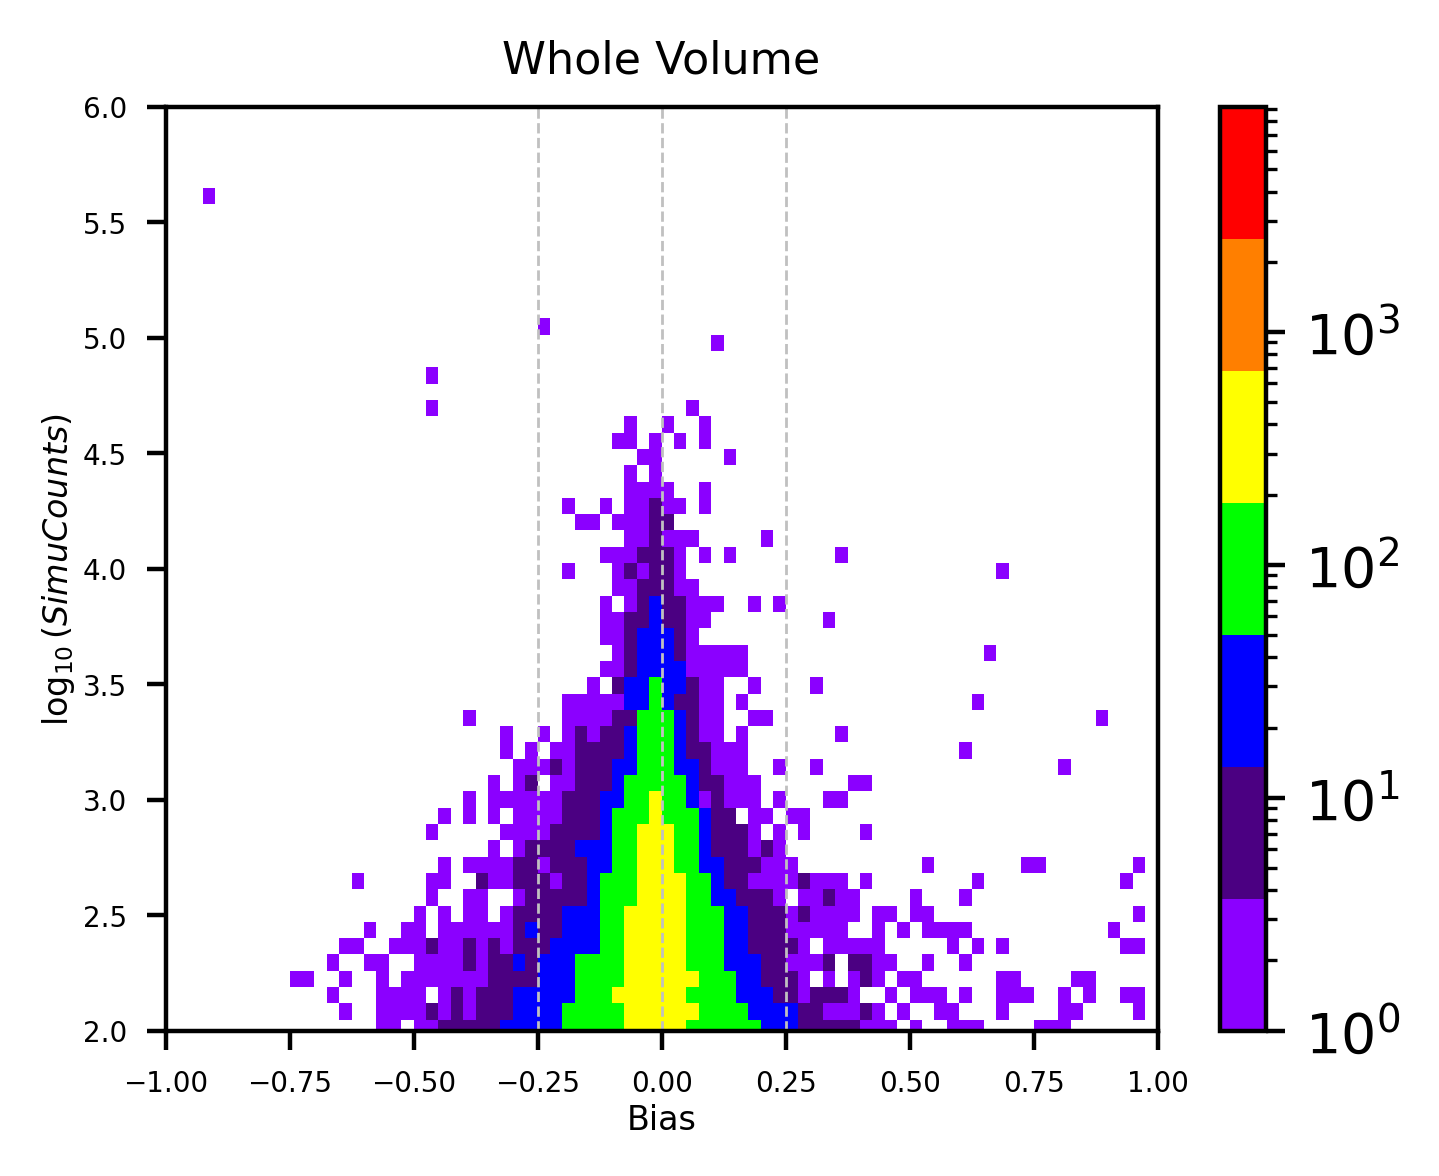

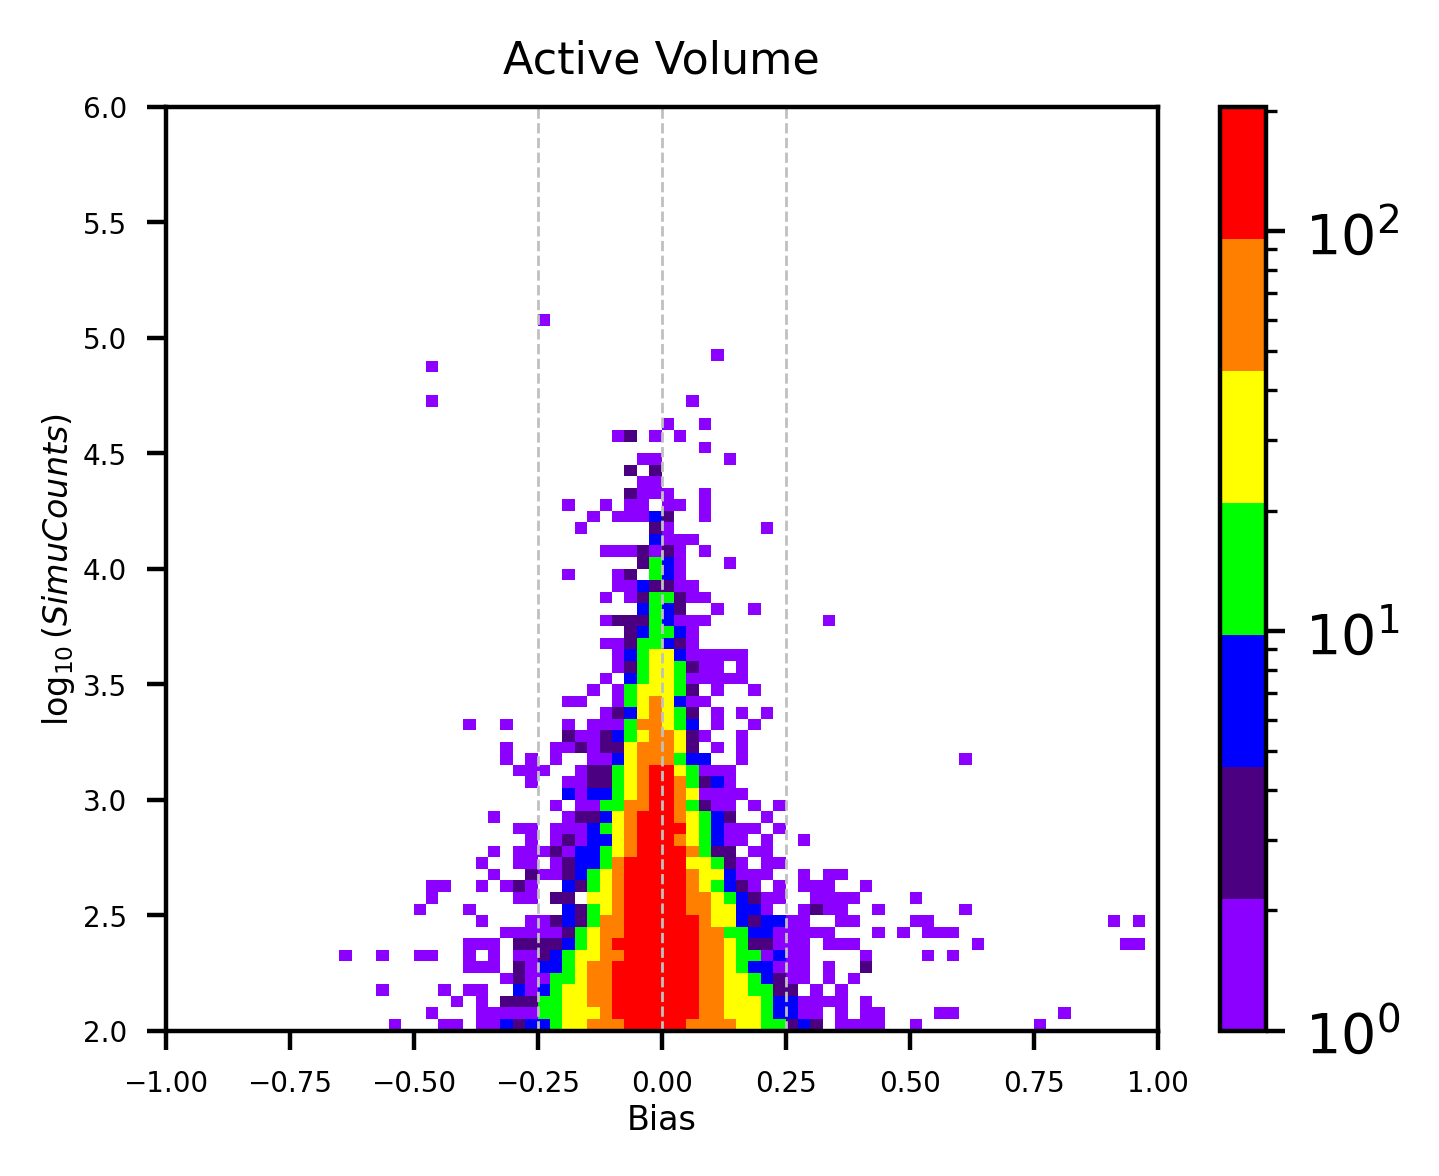

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap








#Bias vs Simu ( (-2, 2))=========================================
plt.figure(figsize=(4,3),dpi=400)

#y=x---
plt.plot([0, 1000000], [0, 0], color="silver", linewidth=0.3, linestyle='--')

plt.plot([1000, 1000], [-2, 2], color="silver", linewidth=0.3, linestyle='--')
plt.plot([10000, 10000], [-2, 2], color="silver", linewidth=0.3, linestyle='--')
plt.plot([100000, 100000], [-2, 2], color="silver", linewidth=0.3, linestyle='--')

plt.plot([0, 1000000], [-1, -1], color="silver", linewidth=0.3, linestyle='--')
plt.plot([0, 1000000], [1, 1], color="silver", linewidth=0.3, linestyle='--')


#Drawing of data points------
plt.scatter(simuValues, biasValues, c='crimson', s=0.4, alpha=1.0, marker='.', label='[1000, 10000]')

#plt.axis('scaled')
#plt.xlim(0, 600000)
plt.ylim(-2, 2)
plt.xlabel('Simu counts', labelpad=1, fontsize=6)
plt.ylabel('Bias values', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

#plt.xscale('log')

plt.title('Bias vs Simu (log, (-2, 2))', fontsize=8)


#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 






# Define discrete colors for a rainbow effect
colors = [
    '#8B00FF',   # Violet
    '#4B0082',  # Indigo
    '#0000FF',  # Blue
    '#00FF00',  # Green
    '#FFFF00',  # Yellow
    '#FF7F00',  # Orange
    '#FF0000'  # Red
]
# Create a discrete colormap
discrete_rainbow = ListedColormap(colors, name='discrete_rainbow')







#Bias vs log(Simu), (-1, 1), 2D histograms============================
plt.figure(figsize=(4,3),dpi=400)



#y=x---
plt.plot([0, 0], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([-0.25, -0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([0.25, 0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')



#plt.hist2d(logSimu, biasPN1, bins=(80, 80), cmap='plasma')
plt.hist2d(biasPN1, logSimu, bins=(80, 80), norm=LogNorm(), cmap=discrete_rainbow)
colorbar = plt.colorbar()

plt.ylim(2, 6)
plt.xlim(-1, 1)

plt.ylabel(r'$\log_{10}(SimuCounts)$', labelpad=1, fontsize=6)
plt.xlabel('Bias', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Whole Volume', fontsize=8)

#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 







#Bias vs log(Simu), (-1, 1), 2D histograms============================
plt.figure(figsize=(4,3),dpi=400)

plt.ylim(2, 6)
plt.xlim(-1, 1)

#y=x---
plt.plot([0, 0], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([-0.25, -0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')
plt.plot([0.25, 0.25], [2, 6], color="silver", linewidth=0.5, linestyle='--')



#plt.hist2d(logSimu, biasPN1, bins=(80, 80), cmap='plasma')
plt.hist2d(activeNP1, activeSimuNP1, bins=(80, 80), range=[[-1, 1], [2, 6]],
           norm=LogNorm(), cmap=discrete_rainbow)
colorbar = plt.colorbar()


plt.ylabel(r'$\log_{10}(SimuCounts)$', labelpad=1, fontsize=6)
plt.xlabel('Bias', labelpad=1, fontsize=6)
plt.tick_params(labelsize=5)#set the size of ticks---

plt.title('Active Volume', fontsize=8)

#Save the plot as a PNG file
#plt.savefig('bias_vs_simu.png', bbox_inches='tight')
plt.show() 


<br />
<br />
<br />
<br />

### Bias Distribution in Geometrical Space:

Maximu value of bias:  inf

# event in [0.0, 0.1]:  42463
# event in (0.1, 0.2]:  19810
# event in (0.2, 0.5]:  25739
# event in (0.5, 1.0]:  30131
# event in (1.0, 10.]:  4308
# event in (10., Inf):  51329
Total event nums     :  173780


length of groupX[ 0 ]:  42463
length of groupY[ 0 ]:  42463
length of groupZ[ 0 ]:  42463
length of groupX[ 1 ]:  19810
length of groupY[ 1 ]:  19810
length of groupZ[ 1 ]:  19810
length of groupX[ 2 ]:  25739
length of groupY[ 2 ]:  25739
length of groupZ[ 2 ]:  25739
length of groupX[ 3 ]:  30131
length of groupY[ 3 ]:  30131
length of groupZ[ 3 ]:  30131
length of groupX[ 4 ]:  4308
length of groupY[ 4 ]:  4308
length of groupZ[ 4 ]:  4308
length of groupX[ 5 ]:  51329
length of groupY[ 5 ]:  51329
length of groupZ[ 5 ]:  51329


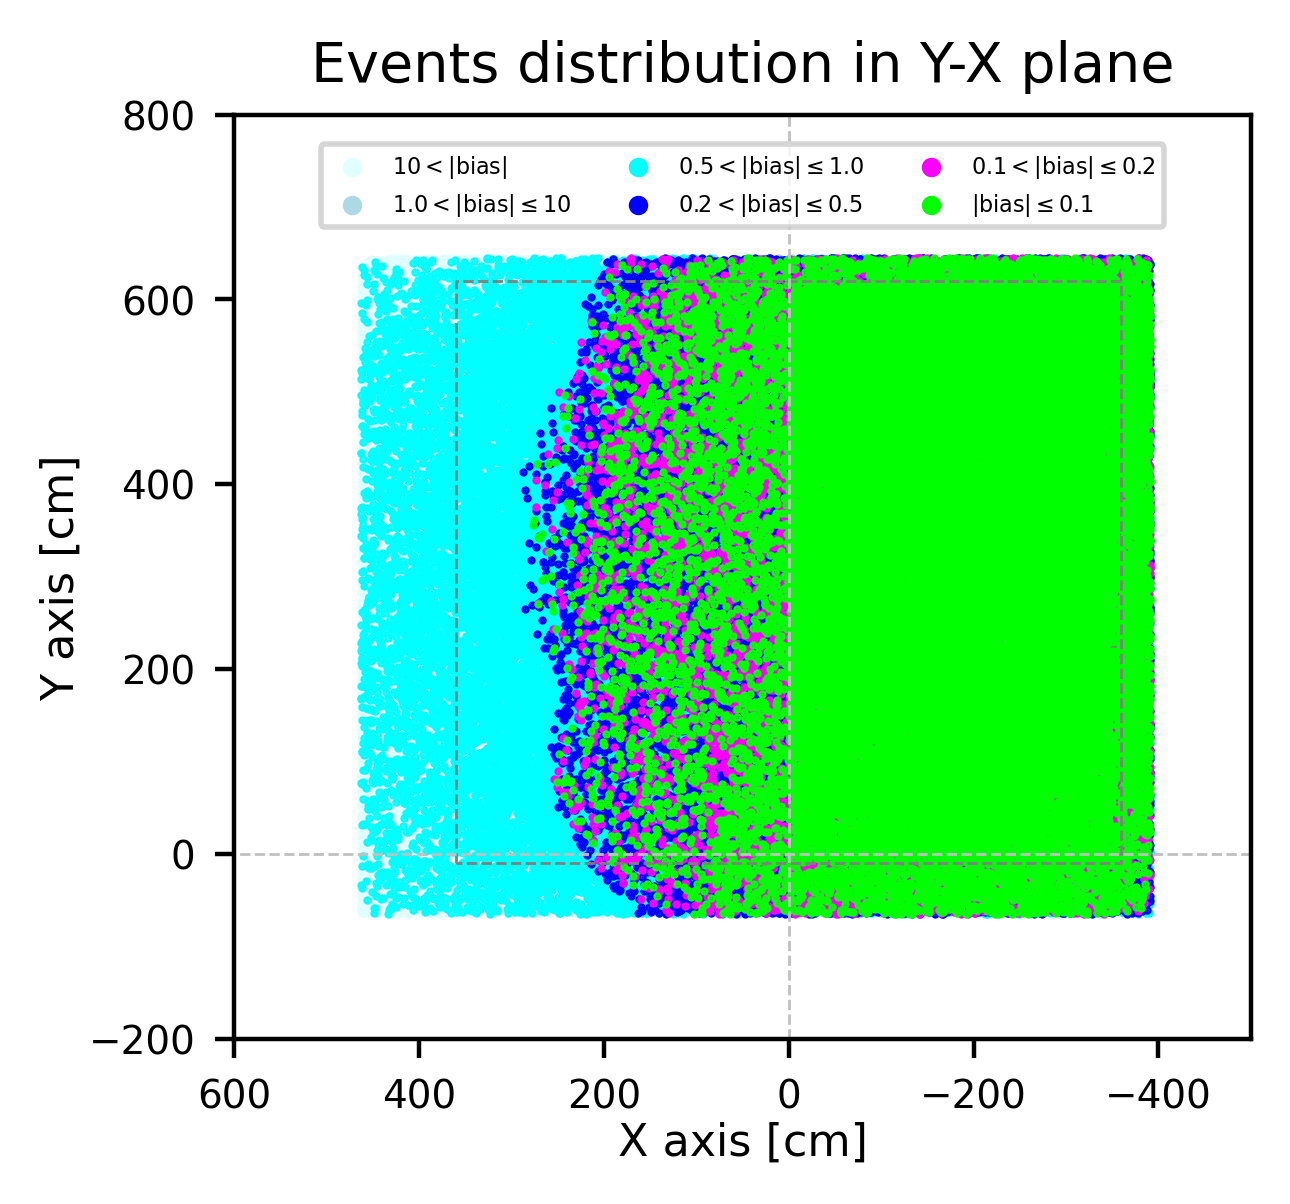

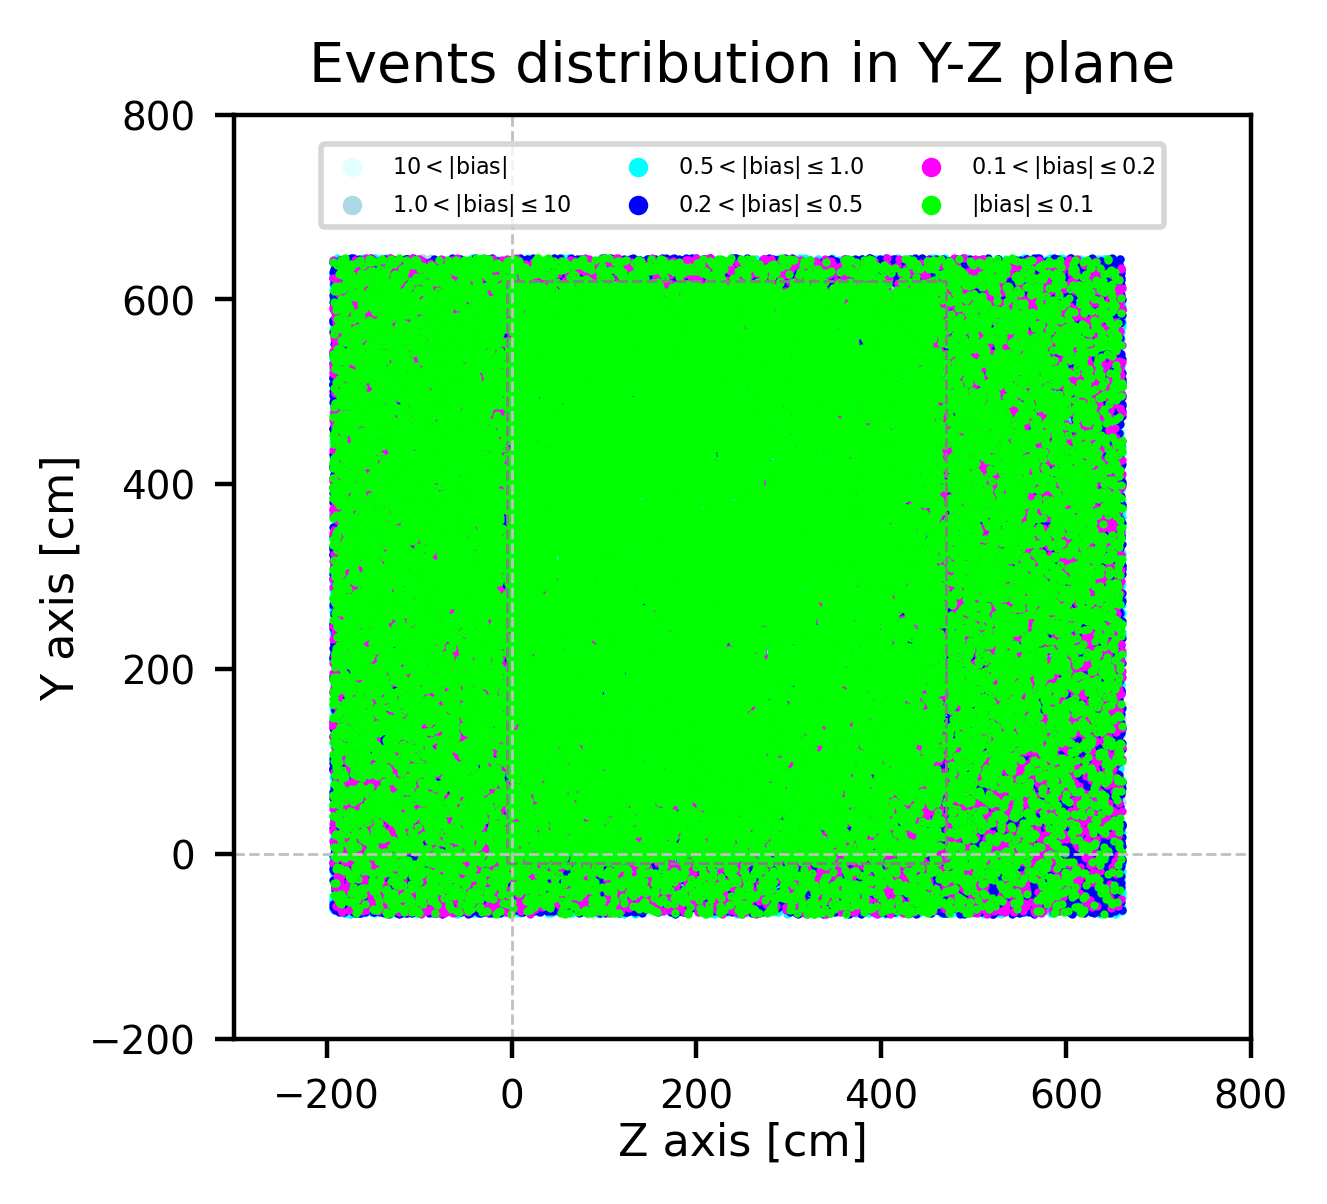

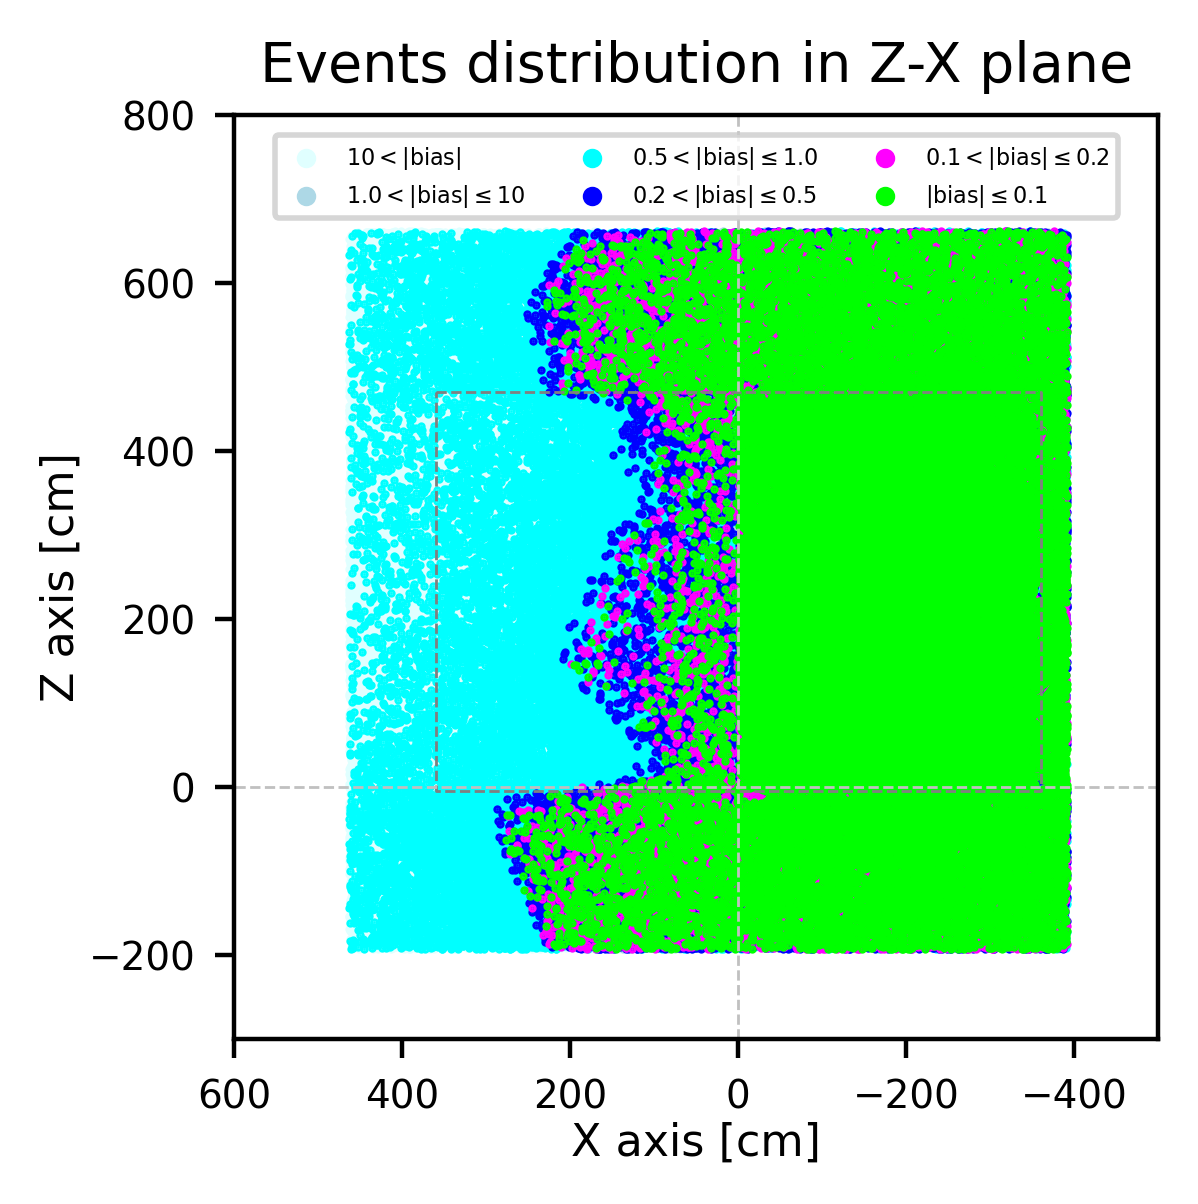

In [9]:
import matplotlib.pyplot as plt
import numpy as np

range001 = 0 #-0.1<=bias<=0.1
range002 = 0 #0.1<|bias|<=0.2
range005 = 0 #0.2<|bias|<=0.5
range010 = 0 #0.5<|bias|<=1.0
rangeTen = 0 #1.0<|bias|<=10.
rangeInf = 0 #10.<|bias|

rows = 2
list001 = [[] for _ in range(rows)]#2D list, list001[0] is label; list001[1] is bias
list002 = [[] for _ in range(rows)]
list005 = [[] for _ in range(rows)]
list010 = [[] for _ in range(rows)]
listTen = [[] for _ in range(rows)]
listInf = [[] for _ in range(rows)]# value out of 10

for i in range(0, len(biasValues)):
    bias = biasValues[i]
    
    if -0.1 <= bias <= 0.1:
        range001 += 1
        list001[0].append(i)
        list001[1].append(bias)
    elif 0.1 < abs(bias) <= 0.2:
        range002 += 1
        list002[0].append(i)
        list002[1].append(bias)
    elif 0.2 < abs(bias) <= 0.5:
        range005 += 1
        list005[0].append(i)
        list005[1].append(bias)
    elif 0.5 < abs(bias) <= 1.0:
        range010 += 1
        list010[0].append(i)
        list010[1].append(bias)
    elif 1.0 < abs(bias) <= 10.0:
        rangeTen += 1
        listTen[0].append(i)
        listTen[1].append(bias)
    elif 10.0 < abs(bias):
        rangeInf += 1
        listInf[0].append(i)
        listInf[1].append(bias)
        
print("Maximu value of bias: ", max(biasValues))        
print("\n# event in [0.0, 0.1]: ", range001)
print("# event in (0.1, 0.2]: ", range002)
print("# event in (0.2, 0.5]: ", range005)
print("# event in (0.5, 1.0]: ", range010)
print("# event in (1.0, 10.]: ", rangeTen)
print("# event in (10., Inf): ", rangeInf)
totalNum_bias = range001 + range002 + range005 + range010 + rangeTen + rangeInf
print("Total event nums     : ", totalNum_bias)




#Divide posX, posY and posZ into different (6) groups---
rows = 6
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list001[0]]#corresponding to list001
groupX[1] = [posX[i] for i in list002[0]]#corresponding to list002
groupX[2] = [posX[i] for i in list005[0]]
groupX[3] = [posX[i] for i in list010[0]]
groupX[4] = [posX[i] for i in listTen[0]]
groupX[5] = [posX[i] for i in listInf[0]]

groupY[0] = [posY[i] for i in list001[0]]
groupY[1] = [posY[i] for i in list002[0]]
groupY[2] = [posY[i] for i in list005[0]]
groupY[3] = [posY[i] for i in list010[0]]
groupY[4] = [posY[i] for i in listTen[0]]
groupY[5] = [posY[i] for i in listInf[0]]

groupZ[0] = [posZ[i] for i in list001[0]]
groupZ[1] = [posZ[i] for i in list002[0]]
groupZ[2] = [posZ[i] for i in list005[0]]
groupZ[3] = [posZ[i] for i in list010[0]]
groupZ[4] = [posZ[i] for i in listTen[0]]
groupZ[5] = [posZ[i] for i in listInf[0]]

print("\n")
for i in range(0, 6):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))
#-----------------------------------------------------------
    
    
    
    
    
    
    
    







#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -500
xmax = 600
ymin = -200
ymax = 800
zmin = -300
zmax = 800

#Y-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXY_y = [-10, 620, 620, -10, -10]
cageXY_x = [360, 360, -360, -360, 360]
plt.plot(cageXY_x, cageXY_y, color="grey", linewidth=0.5, linestyle='--')


#Set equal scaling for both axes---
plt.axis('scaled')
plt.xlim(xmin, xmax)#Since in x-y plane, x axis is y of the geometry---
plt.ylim(ymin, ymax)

#auxiliary line, along y(geo) and x axis---
yauxi1 = [ymin, ymax]
yauxi2 = [0, 0]
plt.plot(yauxi2, yauxi1, color="silver", linewidth=0.5, linestyle='--')
xauxi1 = [0, 0]
xauxi2 = [xmin, xmax]
plt.plot(xauxi2, xauxi1, color="silver", linewidth=0.5, linestyle='--')

#Drawing of data points------
plt.scatter(groupX[5], groupY[5], c='lightcyan', s=1.0, alpha=1.0, marker='.', label=r'$10 < |\text{bias}|$')
plt.scatter(groupX[4], groupY[4], c='lightblue', s=1.0, alpha=1.0, marker='.', label=r'$1.0 < |\text{bias}| \leq 10$')
plt.scatter(groupX[3], groupY[3], c='cyan', s=1.0, alpha=1.0, marker='.', label=r'$0.5 < |\text{bias}| \leq 1.0$')
plt.scatter(groupX[2], groupY[2], c='blue', s=1.0, alpha=1.0, marker='.', label=r'$0.2 < |\text{bias}| \leq 0.5$')
plt.scatter(groupX[1], groupY[1], c='magenta', s=1.0, alpha=1.0, marker='.', label=r'$0.1 < |\text{bias}| \leq 0.2$')
plt.scatter(groupX[0], groupY[0], c='lime', s=1.0, alpha=1.0, marker='.', label=r'$|\text{bias}| \leq 0.1$')







plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.title('Events distribution in Y-X plane', fontsize=10)
plt.tick_params(labelsize=7)#set the size of ticks---
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file
#plt.savefig('emul_YX.png')
plt.show()    
#---------------------------------------------------------






#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupZ[5], groupY[5], c='lightcyan', s=1.0, alpha=1.0, marker='.', label=r'$10 < |\text{bias}|$')
plt.scatter(groupZ[4], groupY[4], c='lightblue', s=1.0, alpha=1.0, marker='.', label=r'$1.0 < |\text{bias}| \leq 10$')
plt.scatter(groupZ[3], groupY[3], c='cyan', s=1.0, alpha=1.0, marker='.', label=r'$0.5 < |\text{bias}| \leq 1.0$')
plt.scatter(groupZ[2], groupY[2], c='blue', s=1.0, alpha=1.0, marker='.', label=r'$0.2 < |\text{bias}| \leq 0.5$')
plt.scatter(groupZ[1], groupY[1], c='magenta', s=1.0, alpha=1.0, marker='.', label=r'$0.1 < |\text{bias}| \leq 0.2$')
plt.scatter(groupZ[0], groupY[0], c='lime', s=1.0, alpha=1.0, marker='.', label=r'$|\text{bias}| \leq 0.1$')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Y-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file

plt.show()    
#---------------------------------------------------------






#Z-X plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageZY_x = [360, -360, -360, 360, 360]
cageZY_z = [470, 470, -5, -5, 470]
plt.plot(cageZY_x, cageZY_z, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) axis---
yauxi5 = [zmin, zmax]
yauxi6 = [0, 0]
plt.plot(yauxi6, yauxi5, color="silver", linewidth=0.5, linestyle='--')
xauxi5= [0, 0]
xauxi6 = [xmin, xmax]
plt.plot(xauxi6, xauxi5, color="silver", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupX[5], groupZ[5], c='lightcyan', s=1.0, alpha=1.0, marker='.', label=r'$10 < |\text{bias}|$')
plt.scatter(groupX[4], groupZ[4], c='lightblue', s=1.0, alpha=1.0, marker='.', label=r'$1.0 < |\text{bias}| \leq 10$')
plt.scatter(groupX[3], groupZ[3], c='cyan', s=1.0, alpha=1.0, marker='.', label=r'$0.5 < |\text{bias}| \leq 1.0$')
plt.scatter(groupX[2], groupZ[2], c='blue', s=1.0, alpha=1.0, marker='.', label=r'$0.2 < |\text{bias}| \leq 0.5$')
plt.scatter(groupX[1], groupZ[1], c='magenta', s=1.0, alpha=1.0, marker='.', label=r'$0.1 < |\text{bias}| \leq 0.2$')
plt.scatter(groupX[0], groupZ[0], c='lime', s=1.0, alpha=1.0, marker='.', label=r'$|\text{bias}| \leq 0.1$')


plt.axis('scaled')
plt.xlim(xmin, xmax)
plt.ylim(zmin, zmax)
plt.xlabel('X axis [cm]', labelpad=1, fontsize=8)
plt.gca().invert_xaxis()
plt.ylabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Z-X plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.99), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file

plt.show()    
#---------------------------------------------------------



    
    
    
    
    
    

<br />
<br />
<br />
<br />

## Bias Distribution in Certain Y-Z plane:



Maximu value of bias:  inf

# event in [0.0, 0.1]:  1062 (53.100%)
# event in (0.1, 0.2]:  420 (21.000%)
# event in (0.2, 0.5]:  378 (18.900%)
# event in (0.5, 1.0]:  89 (4.450%)
# event in (1.0, 10.]:  45 (2.250%)
# event in (10., Inf):  6 (0.300%)
Total events:  2000

For Active Volume:
# event in [0.0, 0.1]:  755 (80.064%)
# event in (0.1, 0.2]:  155 (16.437%)
# event in (0.2, 0.5]:  30 (3.181%)
# event in (0.5, 1.0]:  2 (0.212%)
# event in (1.0, 10.]:  0 (0.000%)
# event in (10., Inf):  1 (0.106%)
Total events:  943


length of groupX[ 0 ]:  1062
length of groupY[ 0 ]:  1062
length of groupZ[ 0 ]:  1062
length of groupX[ 1 ]:  420
length of groupY[ 1 ]:  420
length of groupZ[ 1 ]:  420
length of groupX[ 2 ]:  378
length of groupY[ 2 ]:  378
length of groupZ[ 2 ]:  378
length of groupX[ 3 ]:  89
length of groupY[ 3 ]:  89
length of groupZ[ 3 ]:  89
length of groupX[ 4 ]:  45
length of groupY[ 4 ]:  45
length of groupZ[ 4 ]:  45
length of groupX[ 5 ]:  6
length of groupY[ 5 ]:  6
len

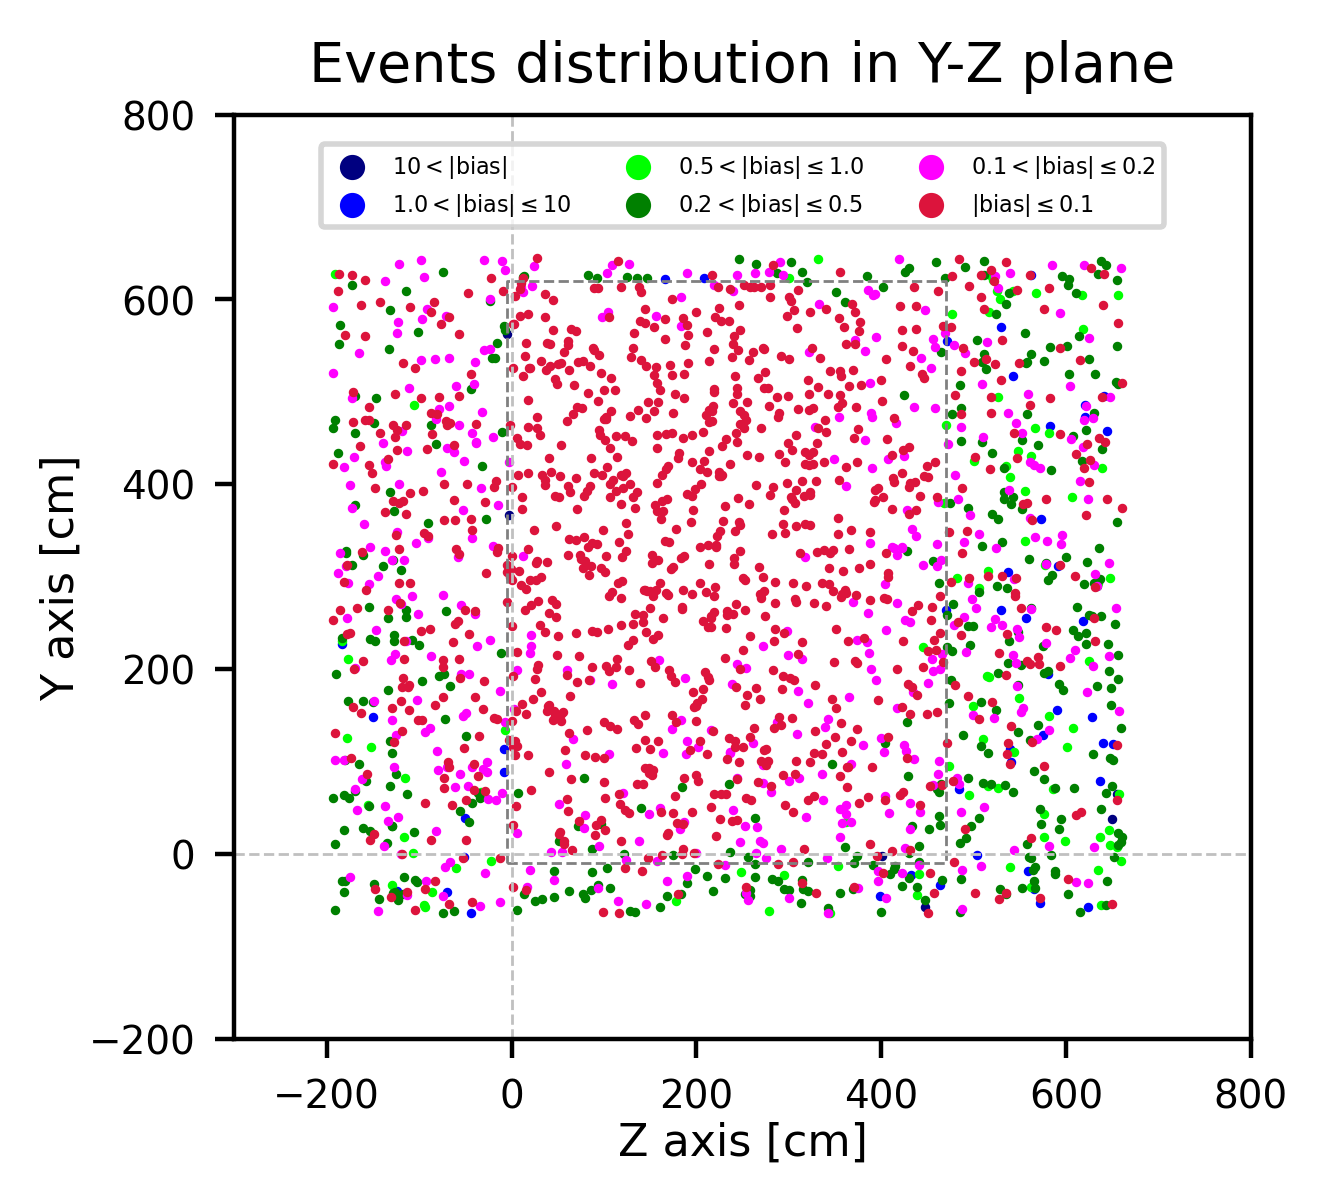

In [10]:
import matplotlib.pyplot as plt
import numpy as np

range001 = 0 #-0.1<=bias<=0.1
range002 = 0 #0.1<|bias|<=0.2
range005 = 0 #0.2<|bias|<=0.5
range010 = 0 #0.5<|bias|<=1.0
rangeTen = 0 #1.0<|bias|<=10.
rangeInf = 0 #10.<|bias|

AVrange001 = 0 #-0.1<=bias<=0.1
AVrange002 = 0 #0.1<|bias|<=0.2
AVrange005 = 0 #0.2<|bias|<=0.5
AVrange010 = 0 #0.5<|bias|<=1.0
AVrangeTen = 0 #1.0<|bias|<=10.
AVrangeInf = 0 #10.<|bias|

rows = 2
list001 = [[] for _ in range(rows)]#2D list, list001[0] is label; list001[1] is bias
list002 = [[] for _ in range(rows)]
list005 = [[] for _ in range(rows)]
list010 = [[] for _ in range(rows)]
listTen = [[] for _ in range(rows)]
listInf = [[] for _ in range(rows)]# value out of 10

for i in range(0, len(biasValues)):
    bias = biasValues[i]
    x = posX[i]
    y = posY[i]
    z = posZ[i]

    #Pay attention: opch133 is at x = -356
    if -310 <= x <= -300: #Key------------------------------------------- 
        if -0.1 <= bias <= 0.1:
            range001 += 1
            list001[0].append(i)
            list001[1].append(bias)

            if -5<y<615 and 0<z<460: #active volume---
                AVrange001 += 1
        
        elif 0.1 < abs(bias) <= 0.2:
            range002 += 1
            list002[0].append(i)
            list002[1].append(bias)

            if -5<y<615 and 0<z<460: #active volume---
                AVrange002 += 1
        
        elif 0.2 < abs(bias) <= 0.5:
            range005 += 1
            list005[0].append(i)
            list005[1].append(bias)

            if -5<y<615 and 0<z<460: #active volume---
                AVrange005 += 1
        
        elif 0.5 < abs(bias) <= 1.0:
            range010 += 1
            list010[0].append(i)
            list010[1].append(bias)

            if -5<y<615 and 0<z<460: #active volume---
                AVrange010 += 1
        
        elif 1.0 < abs(bias) <= 10.0:
            rangeTen += 1
            listTen[0].append(i)
            listTen[1].append(bias)

            if -5<y<615 and 0<z<460: #active volume---
                AVrangeTen += 1
    
        elif 10.0 < abs(bias):
            rangeInf += 1
            listInf[0].append(i)
            listInf[1].append(bias)

            if -5<y<615 and 0<z<460: #active volume---
                AVrangeInf += 1

  

    else: continue





totalNum_bias = range001 + range002 + range005 + range010 + rangeTen + rangeInf
        
print("Maximu value of bias: ", max(biasValues))    

print("\n# event in [0.0, 0.1]: ", range001, "({:.3f}%)".format(range001/totalNum_bias*100))
print("# event in (0.1, 0.2]: ", range002, "({:.3f}%)".format(range002/totalNum_bias*100))
print("# event in (0.2, 0.5]: ", range005, "({:.3f}%)".format(range005/totalNum_bias*100))
print("# event in (0.5, 1.0]: ", range010, "({:.3f}%)".format(range010/totalNum_bias*100))
print("# event in (1.0, 10.]: ", rangeTen, "({:.3f}%)".format(rangeTen/totalNum_bias*100))
print("# event in (10., Inf): ", rangeInf, "({:.3f}%)".format(rangeInf/totalNum_bias*100))
print("Total events: ", totalNum_bias)



#For active volume------
AVtotalNum_bias = AVrange001 + AVrange002 + AVrange005 + AVrange010 + AVrangeTen + AVrangeInf

print("\nFor Active Volume:") 

print("# event in [0.0, 0.1]: ", AVrange001, "({:.3f}%)".format(AVrange001/AVtotalNum_bias*100))
print("# event in (0.1, 0.2]: ", AVrange002, "({:.3f}%)".format(AVrange002/AVtotalNum_bias*100))
print("# event in (0.2, 0.5]: ", AVrange005, "({:.3f}%)".format(AVrange005/AVtotalNum_bias*100))
print("# event in (0.5, 1.0]: ", AVrange010, "({:.3f}%)".format(AVrange010/AVtotalNum_bias*100))
print("# event in (1.0, 10.]: ", AVrangeTen, "({:.3f}%)".format(AVrangeTen/AVtotalNum_bias*100))
print("# event in (10., Inf): ", AVrangeInf, "({:.3f}%)".format(AVrangeInf/AVtotalNum_bias*100))
print("Total events: ", AVtotalNum_bias)





#Divide posX, posY and posZ into different (6) groups---
rows = 6
groupX = [[] for _ in range(rows)]
groupY = [[] for _ in range(rows)]
groupZ = [[] for _ in range(rows)]

groupX[0] = [posX[i] for i in list001[0]]#corresponding to list001
groupX[1] = [posX[i] for i in list002[0]]#corresponding to list002
groupX[2] = [posX[i] for i in list005[0]]
groupX[3] = [posX[i] for i in list010[0]]
groupX[4] = [posX[i] for i in listTen[0]]
groupX[5] = [posX[i] for i in listInf[0]]

groupY[0] = [posY[i] for i in list001[0]]
groupY[1] = [posY[i] for i in list002[0]]
groupY[2] = [posY[i] for i in list005[0]]
groupY[3] = [posY[i] for i in list010[0]]
groupY[4] = [posY[i] for i in listTen[0]]
groupY[5] = [posY[i] for i in listInf[0]]

groupZ[0] = [posZ[i] for i in list001[0]]
groupZ[1] = [posZ[i] for i in list002[0]]
groupZ[2] = [posZ[i] for i in list005[0]]
groupZ[3] = [posZ[i] for i in list010[0]]
groupZ[4] = [posZ[i] for i in listTen[0]]
groupZ[5] = [posZ[i] for i in listInf[0]]

print("\n")
for i in range(0, 6):
    print("length of groupX[",i,"]: ", len(groupX[i]))
    print("length of groupY[",i,"]: ", len(groupY[i]))
    print("length of groupZ[",i,"]: ", len(groupZ[i]))
#-----------------------------------------------------------
    
    
    
    
    
    
    
    







#Start drawing figures======================================    
#Set the limts of x, y and z when drawing---
xmin = -500
xmax = 600
ymin = -200
ymax = 800
zmin = -300
zmax = 800




#Y-Z plane ploting----------------------------------------
plt.figure(figsize=(4,3),dpi=400)


# Define the field cage frame, start from top right, anti-clockwise---
cageXZ_z = [-5, 470, 470, -5, -5]
cageXZ_y = [-10, -10, 620, 620, -10]
plt.plot(cageXZ_z, cageXZ_y, color="grey", linewidth=0.5, linestyle='--')

#auxiliary line, along y(geo) and x axis---
yauxi3 = [ymin, ymax]
yauxi4 = [0, 0]
plt.plot(yauxi4, yauxi3, color="silver", linewidth=0.5, linestyle='--')
xauxi3 = [0, 0]
xauxi4 = [zmin, zmax]
plt.plot(xauxi4, xauxi3, color="silver", linewidth=0.5, linestyle='--')


#Drawing of data points------
plt.scatter(groupZ[5], groupY[5], c='navy', s=2.0, alpha=1.0, marker='.', label=r'$10 < |\text{bias}|$')
plt.scatter(groupZ[4], groupY[4], c='blue', s=2.0, alpha=1.0, marker='.', label=r'$1.0 < |\text{bias}| \leq 10$')
plt.scatter(groupZ[3], groupY[3], c='lime', s=2.0, alpha=1.0, marker='.', label=r'$0.5 < |\text{bias}| \leq 1.0$')
plt.scatter(groupZ[2], groupY[2], c='green', s=2.0, alpha=1.0, marker='.', label=r'$0.2 < |\text{bias}| \leq 0.5$')
plt.scatter(groupZ[1], groupY[1], c='magenta', s=2.0, alpha=1.0, marker='.', label=r'$0.1 < |\text{bias}| \leq 0.2$')
plt.scatter(groupZ[0], groupY[0], c='crimson', s=2.0, alpha=1.0, marker='.', label=r'$|\text{bias}| \leq 0.1$')


plt.axis('scaled')
plt.xlim(zmin, zmax)
plt.ylim(ymin, ymax)
plt.xlabel('Z axis [cm]', labelpad=1, fontsize=8)
plt.ylabel('Y axis [cm]', labelpad=1, fontsize=8)
plt.tick_params(labelsize=7)#set the size of ticks---

plt.title('Events distribution in Y-Z plane', fontsize=10)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.98), fontsize=6, markerscale=5, ncol=3, prop={'size': 4})

#Save the plot as a PNG file

plt.show()    
#---------------------------------------------------------